<h1 align="center"> Portfolio 2: Regression Analysis of Survey Data </h1>

#### by Muhammad Kevin Alrahmanto (muhammad.kevin@mail.ugm.ac.id / kevinalrahmantomuhammad@gmail.com)

In this second notebook, I would like to showcase my skills in regression analysis. I will use a dataset from a published paper that focuses on the online shopping behavior of ITS students (Kuswanto et al., 2020). The dataset consists of online survey responses from 393 students, with 83 of them reporting online shopping experiences. In addition to **multiple linear regression** modeling as reported in the original paper, I will also implement statistical learning approaches, **regression tree** and **random forests**, provided by Hastie et al. (2017). Using these statistical learning algorithms, I would like to show that we can get a deeper understanding of consumer behavior and **effectively cluster them.**

It is important to note that Kuswanto et al. (2020) used a straightforward approach to represent factor scores by calculating the means of observed items. In this notebook, I will also try to conduct another approach by implementing **Partial Least Square-Structural Equation Modeling (PLS-SEM)** to model the factor scores using the guideline proposed by Hair et al. (2021).

<div class="alert-info">
<font color='blue'>
<h3 align="center">
The insight from each analysis is highlighted in blue.

In [1]:
getwd()

[1] "C:/Users/Kevin"

**Original paper:** Survey data on students’ online shopping behaviour: A focus on selected university students in Indonesia (https://www.sciencedirect.com/science/article/pii/S2352340919314295#fig3)

**PLS-SEM in R programming:** https://link.springer.com/chapter/10.1007/978-3-030-80519-7_3

**Statistical learning:** https://hastie.su.domains/ElemStatLearn/

**Dataset:** **O**nline shopping **B**ehavior **S**tudents (OBS) (https://ars.els-cdn.com/content/image/1-s2.0-S2352340919314295-mmc2.zip)

- Response options: from “Strongly Disagree” (scored 1) to “Strongly Agree” (scored 5).

Item:
- Perceived of Risk (POR):
 - POR1: Consumer is in doubt about online shopping due to the high risk of getting a defective product
 - POR2: Consumer thinks that there will be difficulty in solving problems that arise through online shopping (such as exchanged product)
 - POR3: Consumer might receive a defect product
 - POR4: It s difficult to assess the product quality online
 - POR5: Consumer might not receive the product ordered
- Online Advertisement (OAD):
 - OAD1: Online advertising influences the consumer to buy a new product
 - OAD2: Online advertising influences the consumer to try another type of product
 - OAD3: Online advertising influences the decision to change to another brand
- Trust and Security (TAS): 
 - TAS1: Consumer feels convenience with online shopping
 - TAS2: Consumer trusts the online shopping website
 - TAS3: Customer feels that privacy is maintained when doing online shopping
 - TAS4: Online shopping website has good safety features
 - TAS5: Online shopping website has a good reputation
 
- Social influence (SIF):
 - SIF1: People around the customer frequently do online shopping
 - SIF2: People around the customer recommend online shopping over traditional shopping
 - SIF3: Technological development influences the customer to shop online
 
- Quality of Website (QOW):
 - QOW1: Consumer buys from online shop if it is visually interesting and has a well-organized appearance
 - QOW2: Consumer buys from online shop if the navigation flow is user friendly
 - QOW3: Consumer buys from online shop if it is easy to understand the website and its provided information
 - QOW4: Consumer buys from online shop if it has free and easy shipment order fees and transaction procedures 
 - QOW5: Consumer buys from online shop if it gives complete information about the products 
 
- Enjoyment (EJY):
 - EJY1: Online shopping saves time to shop
 - EJY2: Online shopping makes it easy to purchase goods
 - EJY3: Information and facility make it easy to compare and purchase goods
 - EJY4: Online shopping is easy to be carried out in general
 
- Online shopping behaviour (OSB):
 - OSB1: Customer will repeat the online shopping
 - OSB2: Consumer prefers online shopping over conventional shopping

In [2]:
library(pacman)
pacman::p_load(dplyr, tidyr, forcats, ggplot2, ggpubr, seminr, jtools,randomForest,tree, gbm, ISLR, metan,MASS,
               repr, psych, psy, polycor, Gifi, eRm, MPsychoR, mice, smacof, performance, MVN, gtheory,
               corrplot, ggstance,rstatix, haven, magrittr )

Warning message:
"package 'pacman' was built under R version 4.2.3"


In [3]:
OBS <- read_sav('dib_105073_data student online shopping behavior_mmc2.sav')

In [4]:
OBS[, 1:13] %>% 
  mutate_all(as_factor) %>% summary()

     Sex               Allowence  Semester Internet_usage Frequency
 Male  :34   <1000000       :17   1: 3     <8  :18        1 :48    
 Female:49   1000000-2000000:60   3: 7     8-16:48        2 :25    
             >2000000       : 6   4: 1     >16 :17        >2:10    
                                  5:36                             
                                  7:36                             
                                                                   
                                                                   
 Favourite_Market_place       Product    Purchased_product      Provider 
 Shopee   :30           New       :83   New       :81      3        : 9  
 Tokopedia:15           Secondhand: 0   Secondhand: 2      Indosat  :13  
 Others   :13                                              Smartfren: 2  
 Lazada   :12                                              Telkomsel:45  
 Bukalapak: 7                                              XL       :12  
 Zalora   : 

In [5]:
cat_OBS <- OBS[, 1:13] %>% mutate_all(as_factor)
sum_cat <-sapply(cat_OBS[, -1], function (x) by(cat_OBS[, 1], x, 
                                                function(y) prop.table(table(y))*100 ))
sapply(sum_cat, function(x) do.call(rbind, x))

,Male,Female
<1000000,52.94118,47.05882
1000000-2000000,38.33333,61.66667
>2000000,33.33333,66.66667
,Male,Female
1,66.66667,33.33333
3,57.14286,42.85714
4,0.00000,100.00000
5,22.22222,77.77778
7,55.55556,44.44444
,Male,Female


<font color='blue'>
<h4 align="left">
POR1 and OAD3 have the lowest mean score, and QOW5 and EJY4 have the highest mean score: Gaining trust just by stating a complete information? 

- (**lowest**) POR1: Consumer is in **doubt** about online shopping due to the high risk of getting a **defective product**
- (**lowest**) OAD3: Online advertising influences the decision to change to another brand

- (**highest**) QOW5: Consumer buys from online shop if it gives **complete information** about the products 
- (**highest**) EJY4: Online shopping is easy to be carried out in general

In [6]:
OBS_PLS <- OBS[, grep('POR|TAS|QOW|EJY|SIF|OAD|OSB',names(OBS))]
OBS_PLS <- data.frame(OBS_PLS[, -grep('Mean', names(OBS_PLS))])
summary(OBS_PLS)

      POR1            POR2            POR3            POR4           POR5      
 Min.   :1.000   Min.   :1.000   Min.   :1.000   Min.   :1.00   Min.   :1.000  
 1st Qu.:2.000   1st Qu.:2.000   1st Qu.:3.000   1st Qu.:3.00   1st Qu.:2.000  
 Median :3.000   Median :3.000   Median :3.000   Median :4.00   Median :3.000  
 Mean   :2.964   Mean   :3.241   Mean   :3.181   Mean   :3.59   Mean   :2.554  
 3rd Qu.:4.000   3rd Qu.:4.000   3rd Qu.:4.000   3rd Qu.:4.00   3rd Qu.:3.000  
 Max.   :5.000   Max.   :5.000   Max.   :5.000   Max.   :5.00   Max.   :5.000  
      TAS1            TAS2            TAS3            TAS4      
 Min.   :1.000   Min.   :2.000   Min.   :1.000   Min.   :2.000  
 1st Qu.:3.000   1st Qu.:3.000   1st Qu.:3.000   1st Qu.:3.000  
 Median :4.000   Median :4.000   Median :3.000   Median :4.000  
 Mean   :3.554   Mean   :3.675   Mean   :3.482   Mean   :3.614  
 3rd Qu.:4.000   3rd Qu.:4.000   3rd Qu.:4.000   3rd Qu.:4.000  
 Max.   :5.000   Max.   :5.000   Max.   :5.000   M

In [7]:
round(sort(colMeans(OBS_PLS)),3)

POR5  POR1  OAD3  OAD2  SIF2  POR3  POR2  OAD1  OSB2  TAS3  TAS1  POR4  TAS4 
2.554 2.964 2.964 3.036 3.048 3.181 3.241 3.277 3.289 3.482 3.554 3.590 3.614 
 TAS2  SIF1  TAS5  QOW2  OSB1  EJY3  SIF3  QOW4  QOW1  EJY2  QOW3  EJY1  EJY4 
3.675 3.783 3.831 4.096 4.120 4.133 4.169 4.217 4.229 4.289 4.325 4.349 4.361 
 QOW5 
4.506

<font color='blue'>
<h4 align="left">
OAD shows the lowest mean score: should we raise a question on the efficacy of online advertisement? 

 - OAD1: Online advertising influences the consumer to buy a new product
 - OAD2: Online advertising influences the consumer to try another type of product
 - OAD3: Online advertising influences the decision to change to another brand

In [8]:
OBS_mean <- data.frame(OBS[, grep('Mean',names(OBS))])
summary(OBS_mean)

    Mean_POR        Mean_TAS        Mean_QOW        Mean_EJY    
 Min.   :1.400   Min.   :1.600   Min.   :2.600   Min.   :2.250  
 1st Qu.:2.600   1st Qu.:3.200   1st Qu.:4.000   1st Qu.:4.000  
 Median :3.200   Median :3.600   Median :4.400   Median :4.250  
 Mean   :3.106   Mean   :3.631   Mean   :4.275   Mean   :4.283  
 3rd Qu.:3.600   3rd Qu.:4.000   3rd Qu.:4.800   3rd Qu.:4.750  
 Max.   :5.000   Max.   :5.000   Max.   :5.000   Max.   :5.000  
    Mean_SIF        Mean_OAD        Mean_OSB    
 Min.   :2.333   Min.   :1.000   Min.   :1.500  
 1st Qu.:3.333   1st Qu.:2.333   1st Qu.:3.000  
 Median :3.667   Median :3.000   Median :3.500  
 Mean   :3.667   Mean   :3.092   Mean   :3.705  
 3rd Qu.:4.000   3rd Qu.:4.000   3rd Qu.:4.250  
 Max.   :5.000   Max.   :5.000   Max.   :5.000  

In [9]:
round(sort(colMeans(OBS_mean)),3)

Mean_OAD Mean_POR Mean_TAS Mean_SIF Mean_OSB Mean_QOW Mean_EJY 
   3.092    3.106    3.631    3.667    3.705    4.275    4.283

Warning message:
"attributes are not identical across measure variables; they will be dropped"


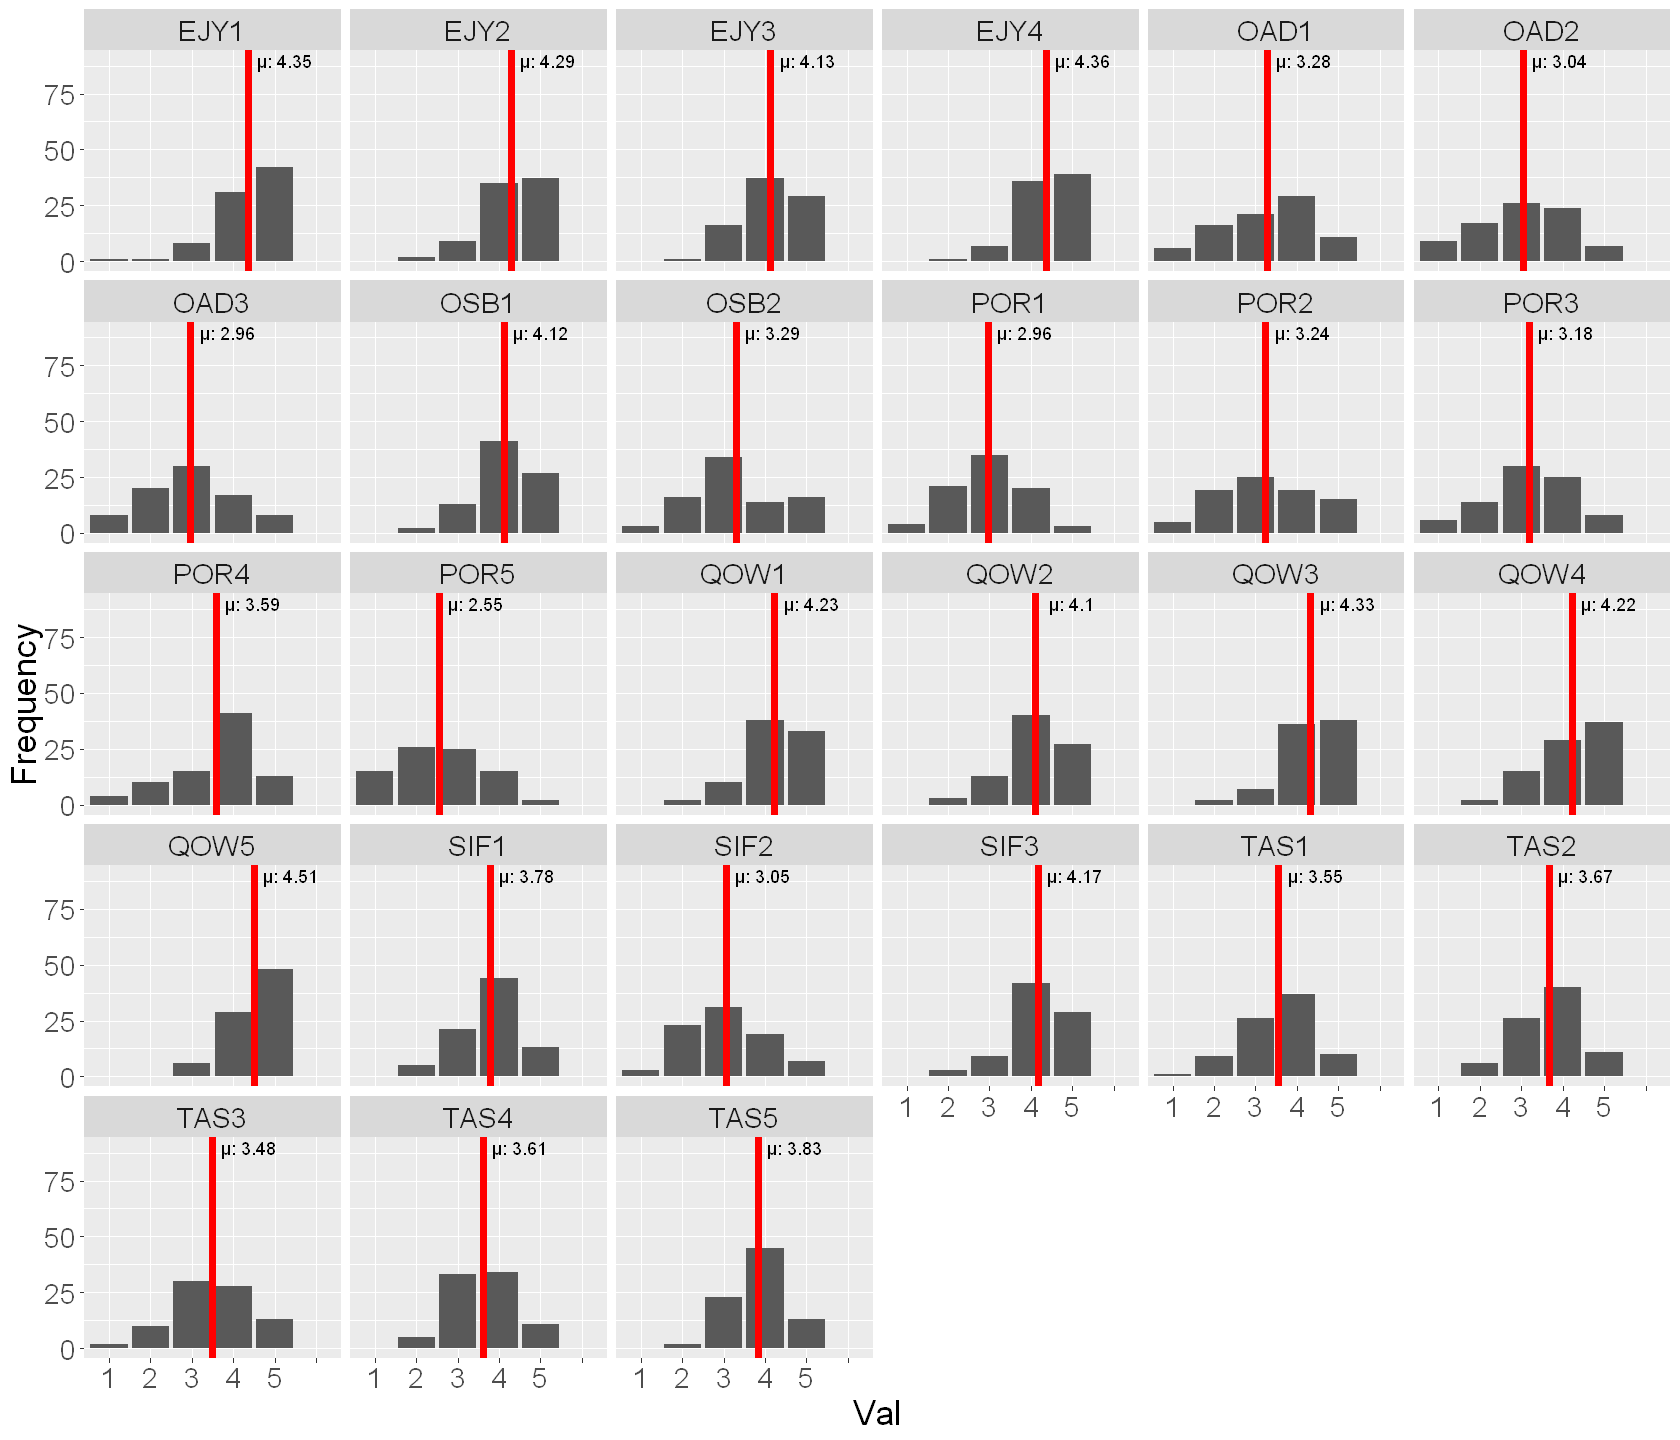

In [10]:
options(repr.plot.width=14, repr.plot.height=12)
OBS_PLS %>% gather('Vars', 'Val') %>% ggplot(aes(x=Val)) + theme(text=element_text(size=21))+
geom_bar() + stat_summaryh(fun.x=mean, geom="vline", aes(xintercept=after_stat(x), y=0), col='red', lwd=2) +
    stat_summaryh(fun.x=mean, geom="text", aes(label=paste0("μ: ",round(after_stat(x),2)), y=90),  angle=0, position=position_nudge(x=0.9))+
facet_wrap(~Vars) + scale_x_discrete(limits=c('1','2','3', '4', '5', '')) + labs(y='Frequency')

<div class="alert-info">
<font color='blue'>
<h3 align="center">
~ 

# 1. Mean Score Approach

## 1.1 Principal Component Analysis

<font color='blue'>
<h4 align="left">
Insight: Compared to the other factors, enjoyment is the most closely related to online shopping behavior.

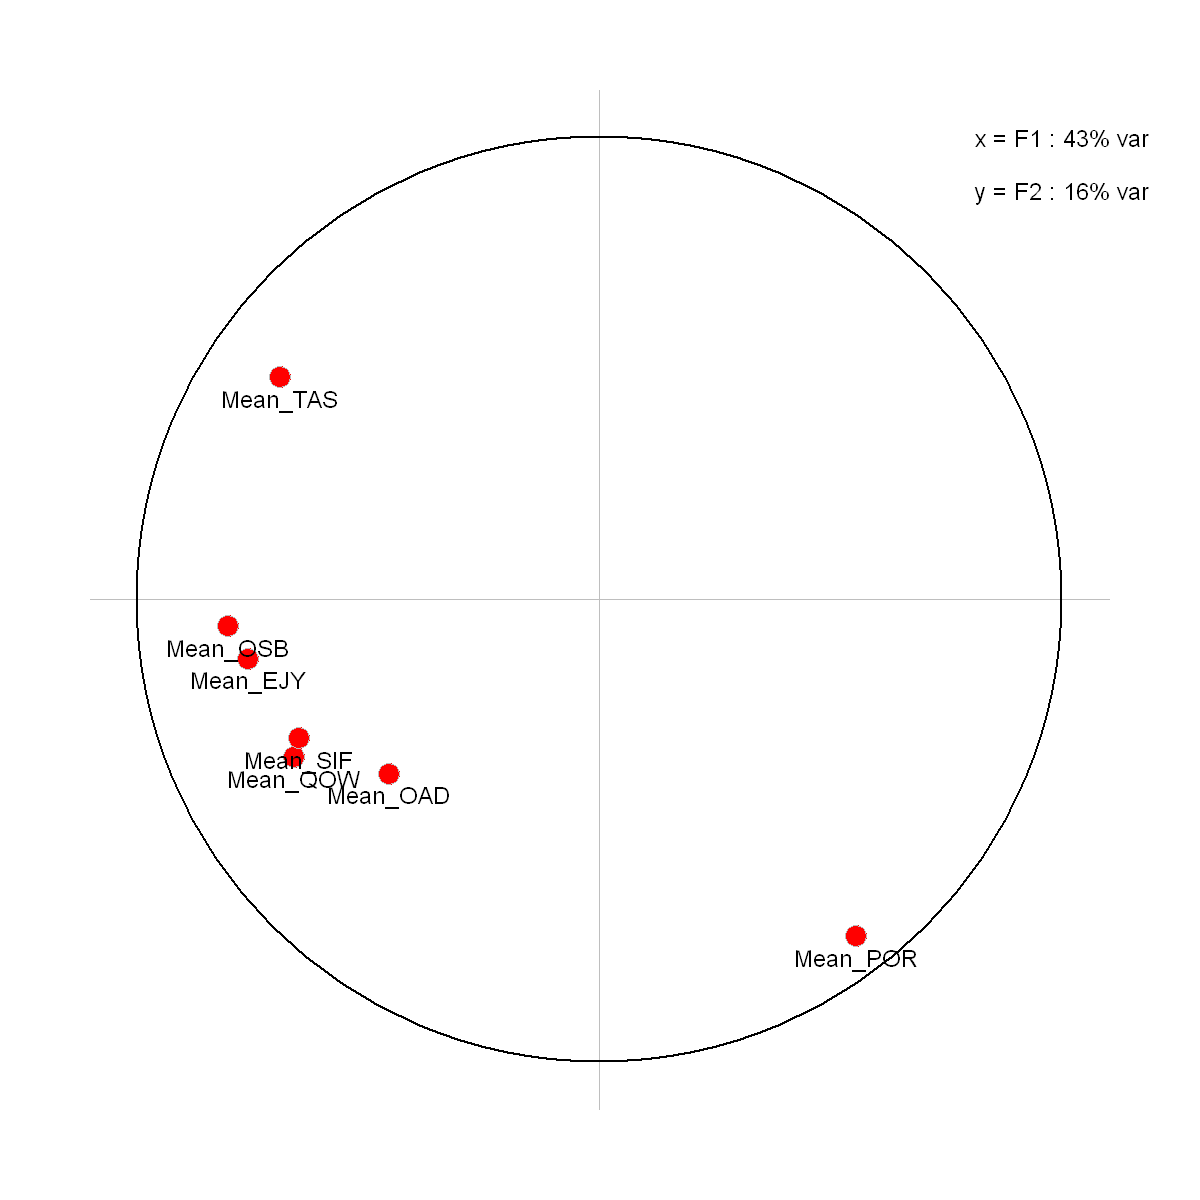

In [11]:
options(repr.plot.width=10, repr.plot.height=10)
mdspca(OBS_mean, cx=1.2)

## 1.2 Distribution and Pair Analysis

<font color='blue'>
<h4 align="left">
Comfort and easiness are everything! The quality of the website (QOW) and enjoyment (EJY) are the only factors that are showing left skewed distribution. 

- Quality of Website (QOW):
 - QOW1: Consumer buys from online shop if it is visually interesting and has a well-organized appearance
 - QOW2: Consumer buys from online shop if the navigation flow is **user friendly**
 - QOW3: Consumer buys from online shop if it is **easy to understand** the website and its provided information
 - QOW4: Consumer buys from online shop if it has **free and easy shipment** order fees and transaction procedures 
 - QOW5: Consumer buys from online shop if it gives complete information about the products 
 
- Enjoyment (EJY):
 - EJY1: Online shopping saves time to shop
 - EJY2: Online shopping makes it **easy to purchase** goods
 - EJY3: Information and facility make it **easy to compare** and purchase goods
 - EJY4: Online shopping is **easy** to be carried out in general

### 1.2.1 Visualization

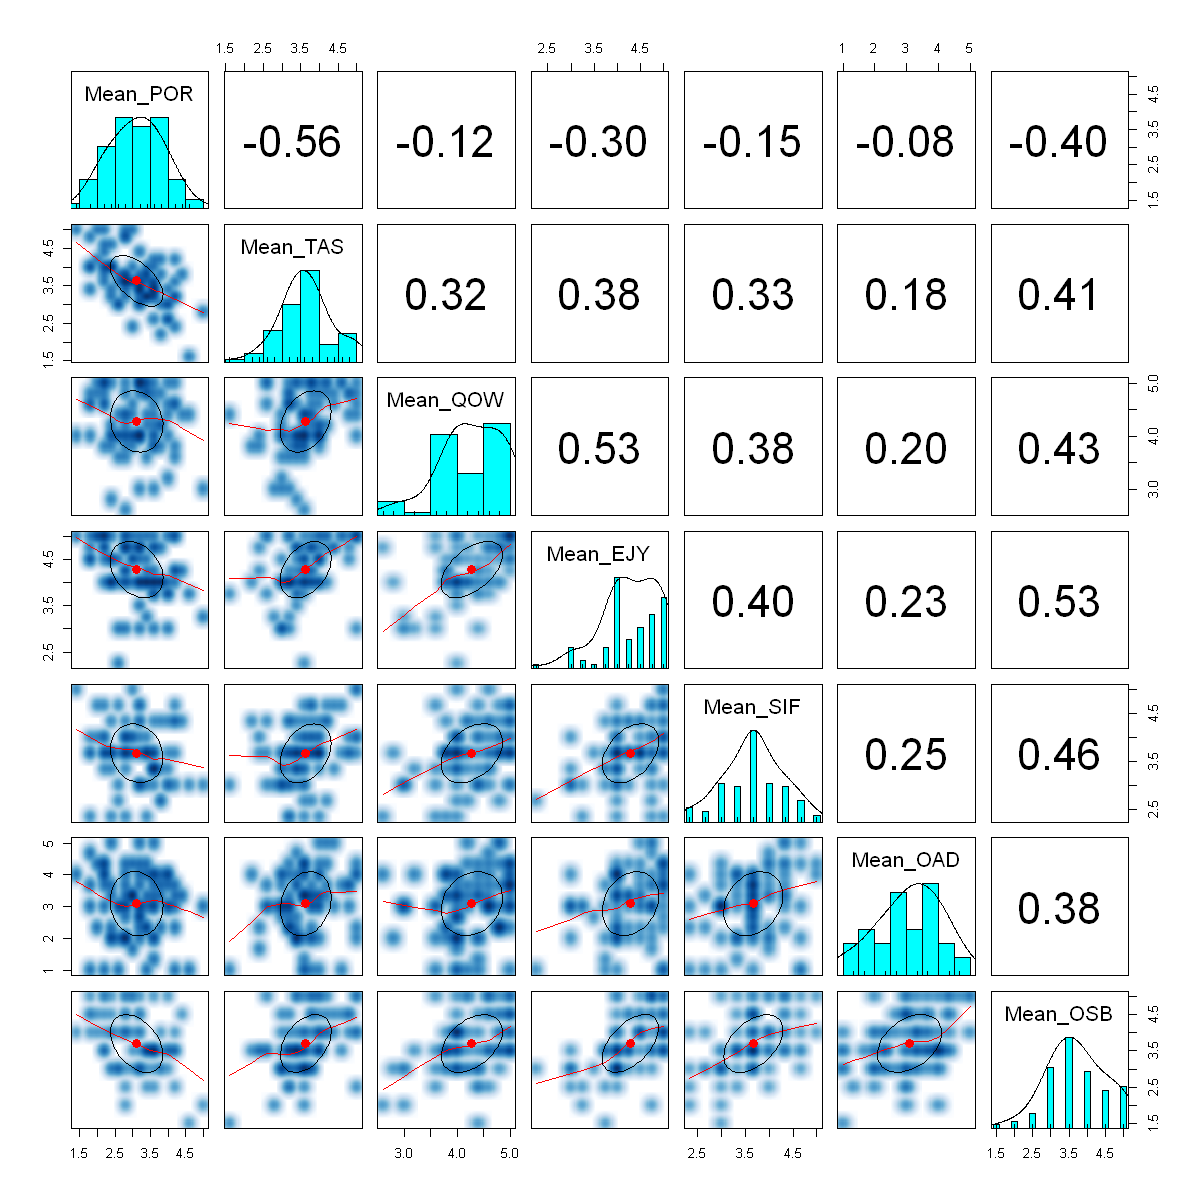

In [12]:
options(repr.plot.width=10, repr.plot.height=10)
pairs.panels(OBS_mean,cex.labels=1.6, cex.cor=2, smoother = T )

### 1.2.2 Inferential Statistics of Correlation Matrix

In [13]:
print(psych::corr.test(OBS_mean), short=FALSE)

Call:psych::corr.test(x = OBS_mean)
Correlation matrix 
         Mean_POR Mean_TAS Mean_QOW Mean_EJY Mean_SIF Mean_OAD Mean_OSB
Mean_POR     1.00    -0.56    -0.12    -0.30    -0.15    -0.08    -0.40
Mean_TAS    -0.56     1.00     0.32     0.38     0.33     0.18     0.41
Mean_QOW    -0.12     0.32     1.00     0.53     0.38     0.20     0.43
Mean_EJY    -0.30     0.38     0.53     1.00     0.40     0.23     0.53
Mean_SIF    -0.15     0.33     0.38     0.40     1.00     0.25     0.46
Mean_OAD    -0.08     0.18     0.20     0.23     0.25     1.00     0.38
Mean_OSB    -0.40     0.41     0.43     0.53     0.46     0.38     1.00
Sample Size 
[1] 83
Probability values (Entries above the diagonal are adjusted for multiple tests.) 
         Mean_POR Mean_TAS Mean_QOW Mean_EJY Mean_SIF Mean_OAD Mean_OSB
Mean_POR     0.00      0.0     0.58     0.04     0.54     0.58     0.00
Mean_TAS     0.00      0.0     0.03     0.01     0.03     0.42     0.00
Mean_QOW     0.29      0.0     0.00     0.00     0

Call:corCi(x = x, keys = keys, n.iter = n.iter, p = p, overlap = overlap, 
    poly = poly, method = method, plot = plot, minlength = minlength, 
    n = n)

 Coefficients and bootstrapped confidence intervals 
         M_POR M_TAS M_QOW M_EJY M_SIF M_OAD M_OSB
Mean_POR  1.00                                    
Mean_TAS -0.56  1.00                              
Mean_QOW -0.12  0.32  1.00                        
Mean_EJY -0.30  0.38  0.53  1.00                  
Mean_SIF -0.15  0.33  0.38  0.40  1.00            
Mean_OAD -0.08  0.18  0.20  0.23  0.25  1.00      
Mean_OSB -0.40  0.41  0.43  0.53  0.46  0.38  1.00

 scale correlations and bootstrapped confidence intervals 
            lower.emp lower.norm estimate upper.norm upper.emp    p
M_POR-M_TAS     -0.67      -0.69    -0.56      -0.39     -0.41 0.00
M_POR-M_QOW     -0.35      -0.34    -0.12       0.10      0.06 0.28
M_POR-M_EJY     -0.50      -0.49    -0.30      -0.10     -0.11 0.00
M_POR-M_SIF     -0.35      -0.37    -0.15       0

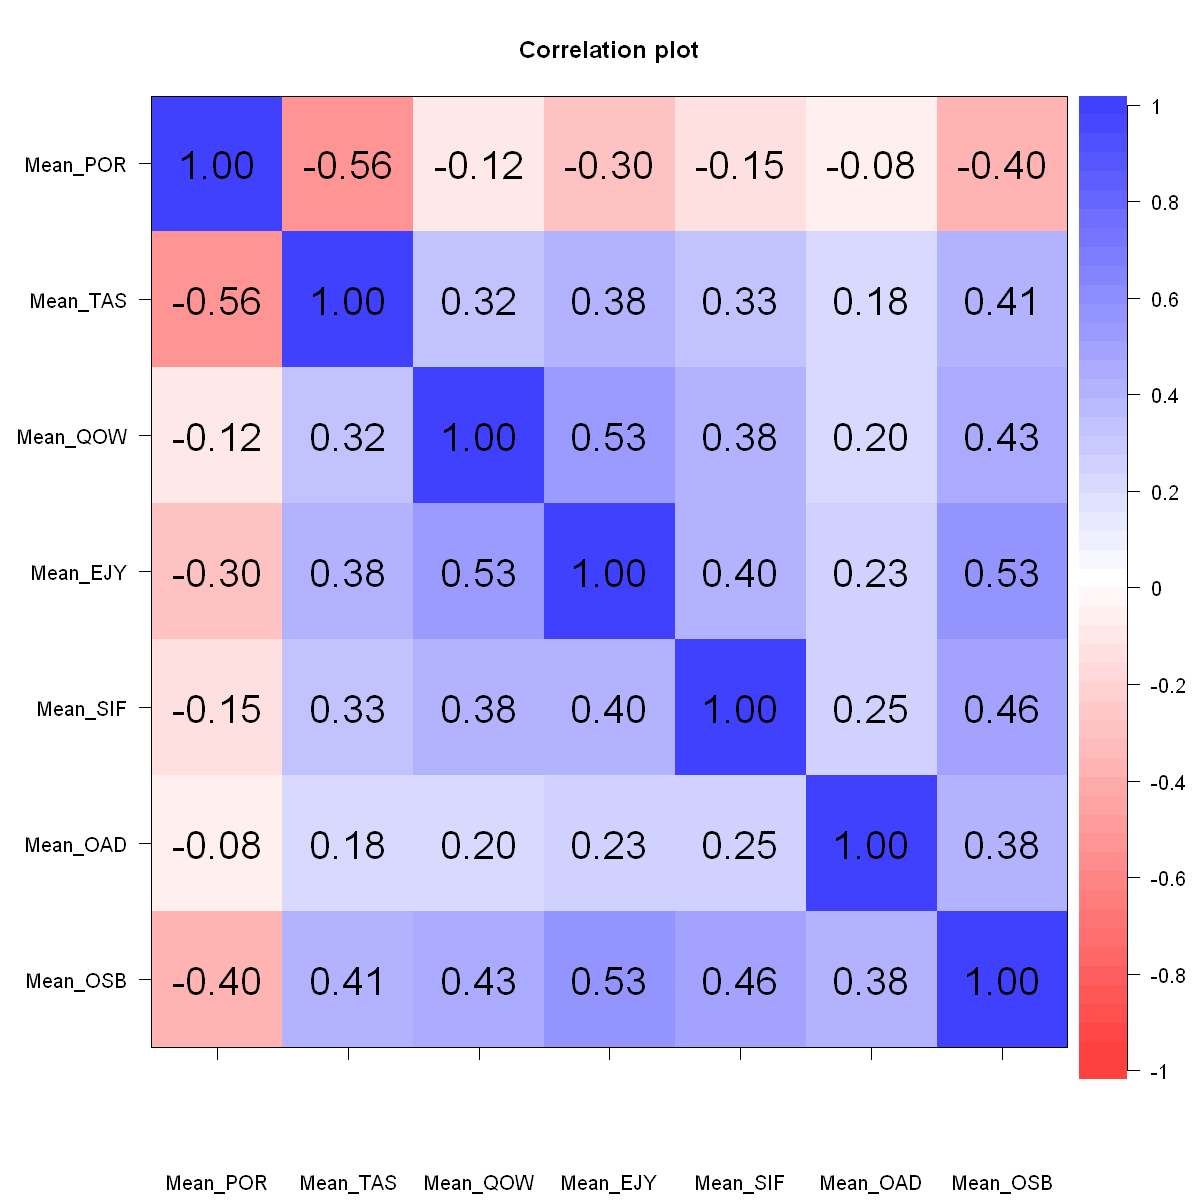

In [14]:
psych::cor.ci(OBS_mean )

<font color='blue'>
<h4 align="left">
Insight: Enjoyment (EJY), quality of the website (QOW) and social influence (SIF) are the most significant factors that have correlation with online shopping behavior.

This code below computes the half-width confidence interval for correlation coefficient using the nonparametric method proposed by Olivoto et al. (2018).

In [15]:
metan::corr_ci(OBS_mean, verbose = F)  %>% filter(V2 =='Mean_OSB' ) %>% arrange(CI)

V1,V2,Corr,n,CI,LL,UL
<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Mean_EJY,Mean_OSB,0.5326735,83,0.1614588,0.3712147,0.6941324
Mean_SIF,Mean_OSB,0.4563083,83,0.1715225,0.2847858,0.6278307
Mean_QOW,Mean_OSB,0.4265285,83,0.1756148,0.2509137,0.6021434
Mean_TAS,Mean_OSB,0.4098642,83,0.1779473,0.2319169,0.5878116
Mean_POR,Mean_OSB,-0.3967600,83,0.1798032,-0.5765632,-0.2169567
Mean_OAD,Mean_OSB,0.3772731,83,0.1825990,0.1946741,0.5598721


## 1.3 Multiple Linear Regression Analysis

<font color='blue'>
<h4 align="left">
Insight: Trust and Security( TAS) shows a very low association with online shopping behavior. This result is in line with the PCA plot.

- Trust and Security (TAS): 
 - TAS1: Consumer feels convenience with online shopping
 - TAS2: Consumer trusts the online shopping website
 - TAS3: Customer feels that privacy is maintained when doing online shopping
 - TAS4: Online shopping website has good safety features
 - TAS5: Online shopping website has a good reputation

In [16]:
OBS_lm <- lm(Mean_OSB~., OBS_mean)
summary(OBS_lm)


Call:
lm(formula = Mean_OSB ~ ., data = OBS_mean)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.41221 -0.38272  0.00614  0.38487  1.48206 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  0.69332    0.82453   0.841   0.4031  
Mean_POR    -0.25442    0.10919  -2.330   0.0225 *
Mean_TAS     0.04153    0.12674   0.328   0.7441  
Mean_QOW     0.18977    0.14006   1.355   0.1795  
Mean_EJY     0.31411    0.13797   2.277   0.0256 *
Mean_SIF     0.26421    0.12299   2.148   0.0349 *
Mean_OAD     0.16997    0.06853   2.480   0.0153 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5979 on 76 degrees of freedom
Multiple R-squared:  0.4726,	Adjusted R-squared:  0.4309 
F-statistic: 11.35 on 6 and 76 DF,  p-value: 5.104e-09


### 1.3.1 Coefficient Diagnostic

Loading required namespace: broom.mixed

Loading required namespace: broom.mixed

No line.size specified for inner CI level. Defaulting to line.size * 2.


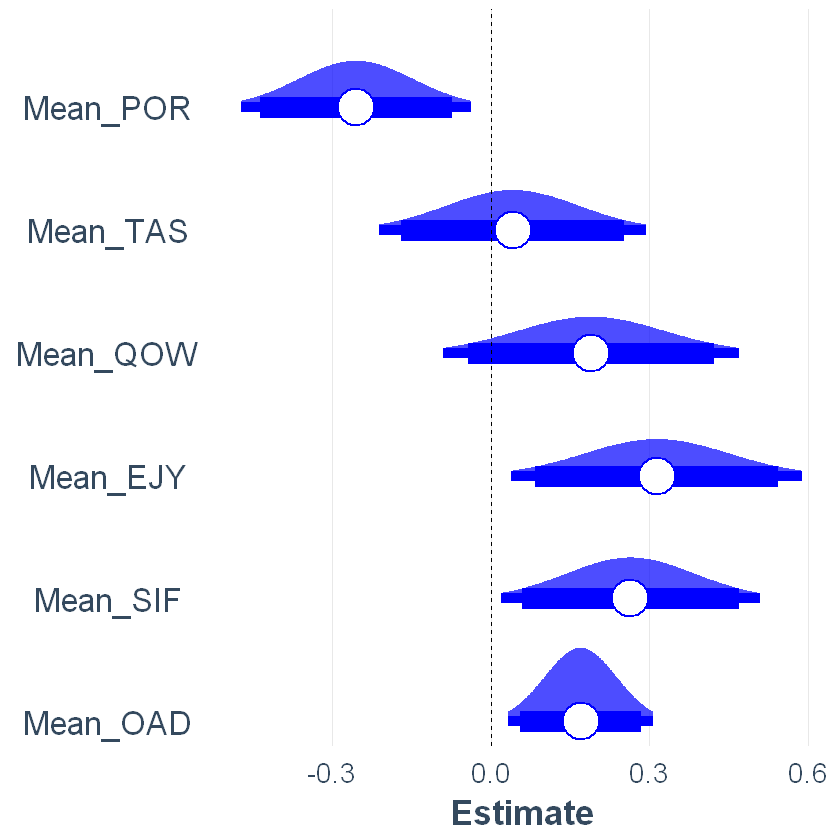

In [17]:
options(repr.plot.width=7, repr.plot.height=7)
plot_summs(OBS_lm, colors = 'blue', line.size = 3, point.size = 20,cex=10, inner_ci_level = .9, plot.distributions = TRUE) + theme(text=element_text(size=21)) + 
theme(axis.text.y = element_text(size = 20))

### 1.3.2 Model Diagnostic

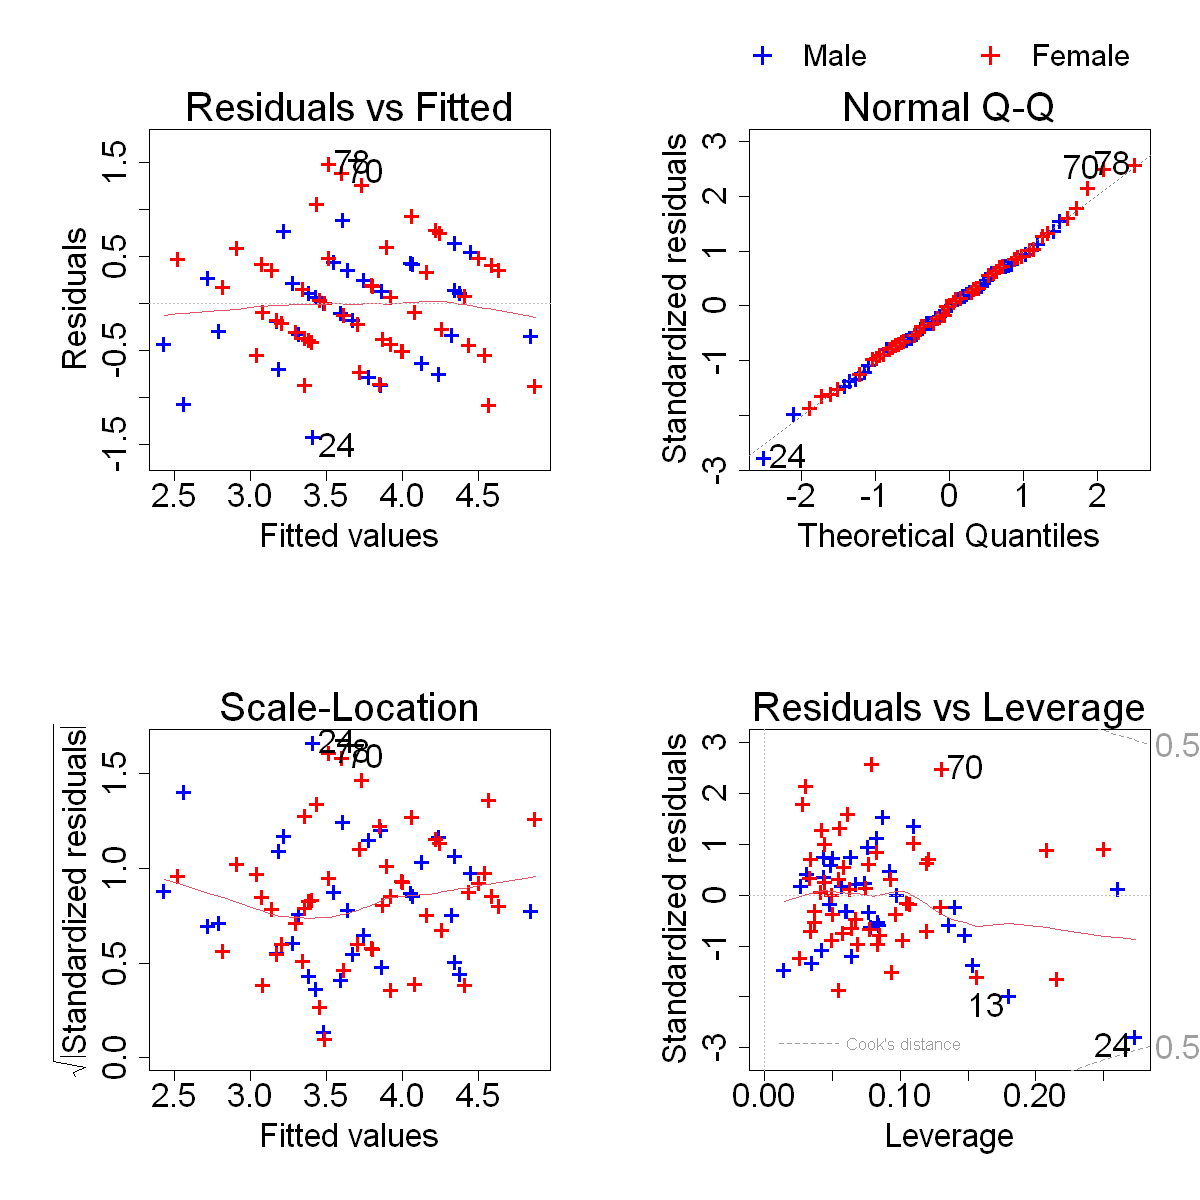

In [18]:
options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(2,2), mar=c(5,6,5,1)+1.5)
plot(OBS_lm, cex=2, cex.lab=2, cex.id = 2, col = c('Blue', 'Red')[unclass(OBS$Sex)], pch='+', cex.axis=2, cex.caption=2)
reset <- function() {
    par(mfrow=c(1, 1), oma=rep(0, 4), mar=rep(0, 4.5), new=TRUE)
    plot(0:1, 0:1, type="n", xlab="", ylab="", axes=FALSE)
    }
reset()
legend("topright", legend=c("Male", "Female"), col=c('Blue', 'Red'),
       ncol=2, bty="n", pch='+', cex=1.5, pt.cex = 2)

In [19]:
OBS[c(13, 24, 70, 78), ]

Sex,Allowence,Semester,Internet_usage,Frequency,Favourite_Market_place,Product,Purchased_product,Provider,Price,⋯,SIF2,SIF3,Mean_SIF,OAD1,OAD2,OAD3,Mean_OAD,OSB1,OSB2,Mean_OSB
<dbl+lbl>,<dbl+lbl>,<dbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,⋯,<dbl+lbl>,<dbl+lbl>,<dbl>,<dbl+lbl>,<dbl+lbl>,<dbl+lbl>,<dbl>,<dbl+lbl>,<dbl+lbl>,<dbl>
1,2,5,1,1,4,1,2,4,1,⋯,2,4,3.000000,1,1,1,1,2,1,1.5
1,1,7,2,1,5,1,1,1,1,⋯,2,3,2.333333,5,3,4,4,2,2,2.0
2,1,7,3,3,5,1,1,4,3,⋯,2,4,3.000000,3,2,4,3,5,5,5.0
2,3,7,2,1,6,1,1,3,1,⋯,1,5,3.333333,2,1,3,2,5,5,5.0


## 1.4 Regression Tree

<font color='blue'>
<h4 align="left">
Insight: Clusters of online shopping behaviors were detected, but with few observations (<100) and many variables (19), interpretation must be carried out cautiously. However, this model can still inform selection of customer types for QUALITATIVE RESEARCH.

### 1.4.1 Auto fitting model

In [20]:
OBS_tree <- cbind(cat_OBS, OBS_mean)

In [21]:
set.seed(1)
train <- OBS_tree %>%
  sample_frac(0.50)
test <- setdiff(OBS_tree, train)

In [22]:
tree.fit <- tree(Mean_OSB ~. , data = OBS_tree)
summary(tree.fit)
tree.pred <- predict(tree.fit, newdata = test)


Regression tree:
tree(formula = Mean_OSB ~ ., data = OBS_tree)
Variables actually used in tree construction:
[1] "Mean_EJY"               "Type_of_Product"        "Mean_SIF"              
[4] "Sex"                    "Mean_TAS"               "Frequency"             
[7] "Provider"               "Mean_QOW"               "Favourite_Market_place"
Number of terminal nodes:  12 
Residual mean deviance:  0.2437 = 17.3 / 71 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.2000 -0.2143  0.0000  0.0000  0.2429  1.0000 

In [23]:
sqrt(mean((tree.pred - test$Mean_OSB)^2))

[1] 0.4292039

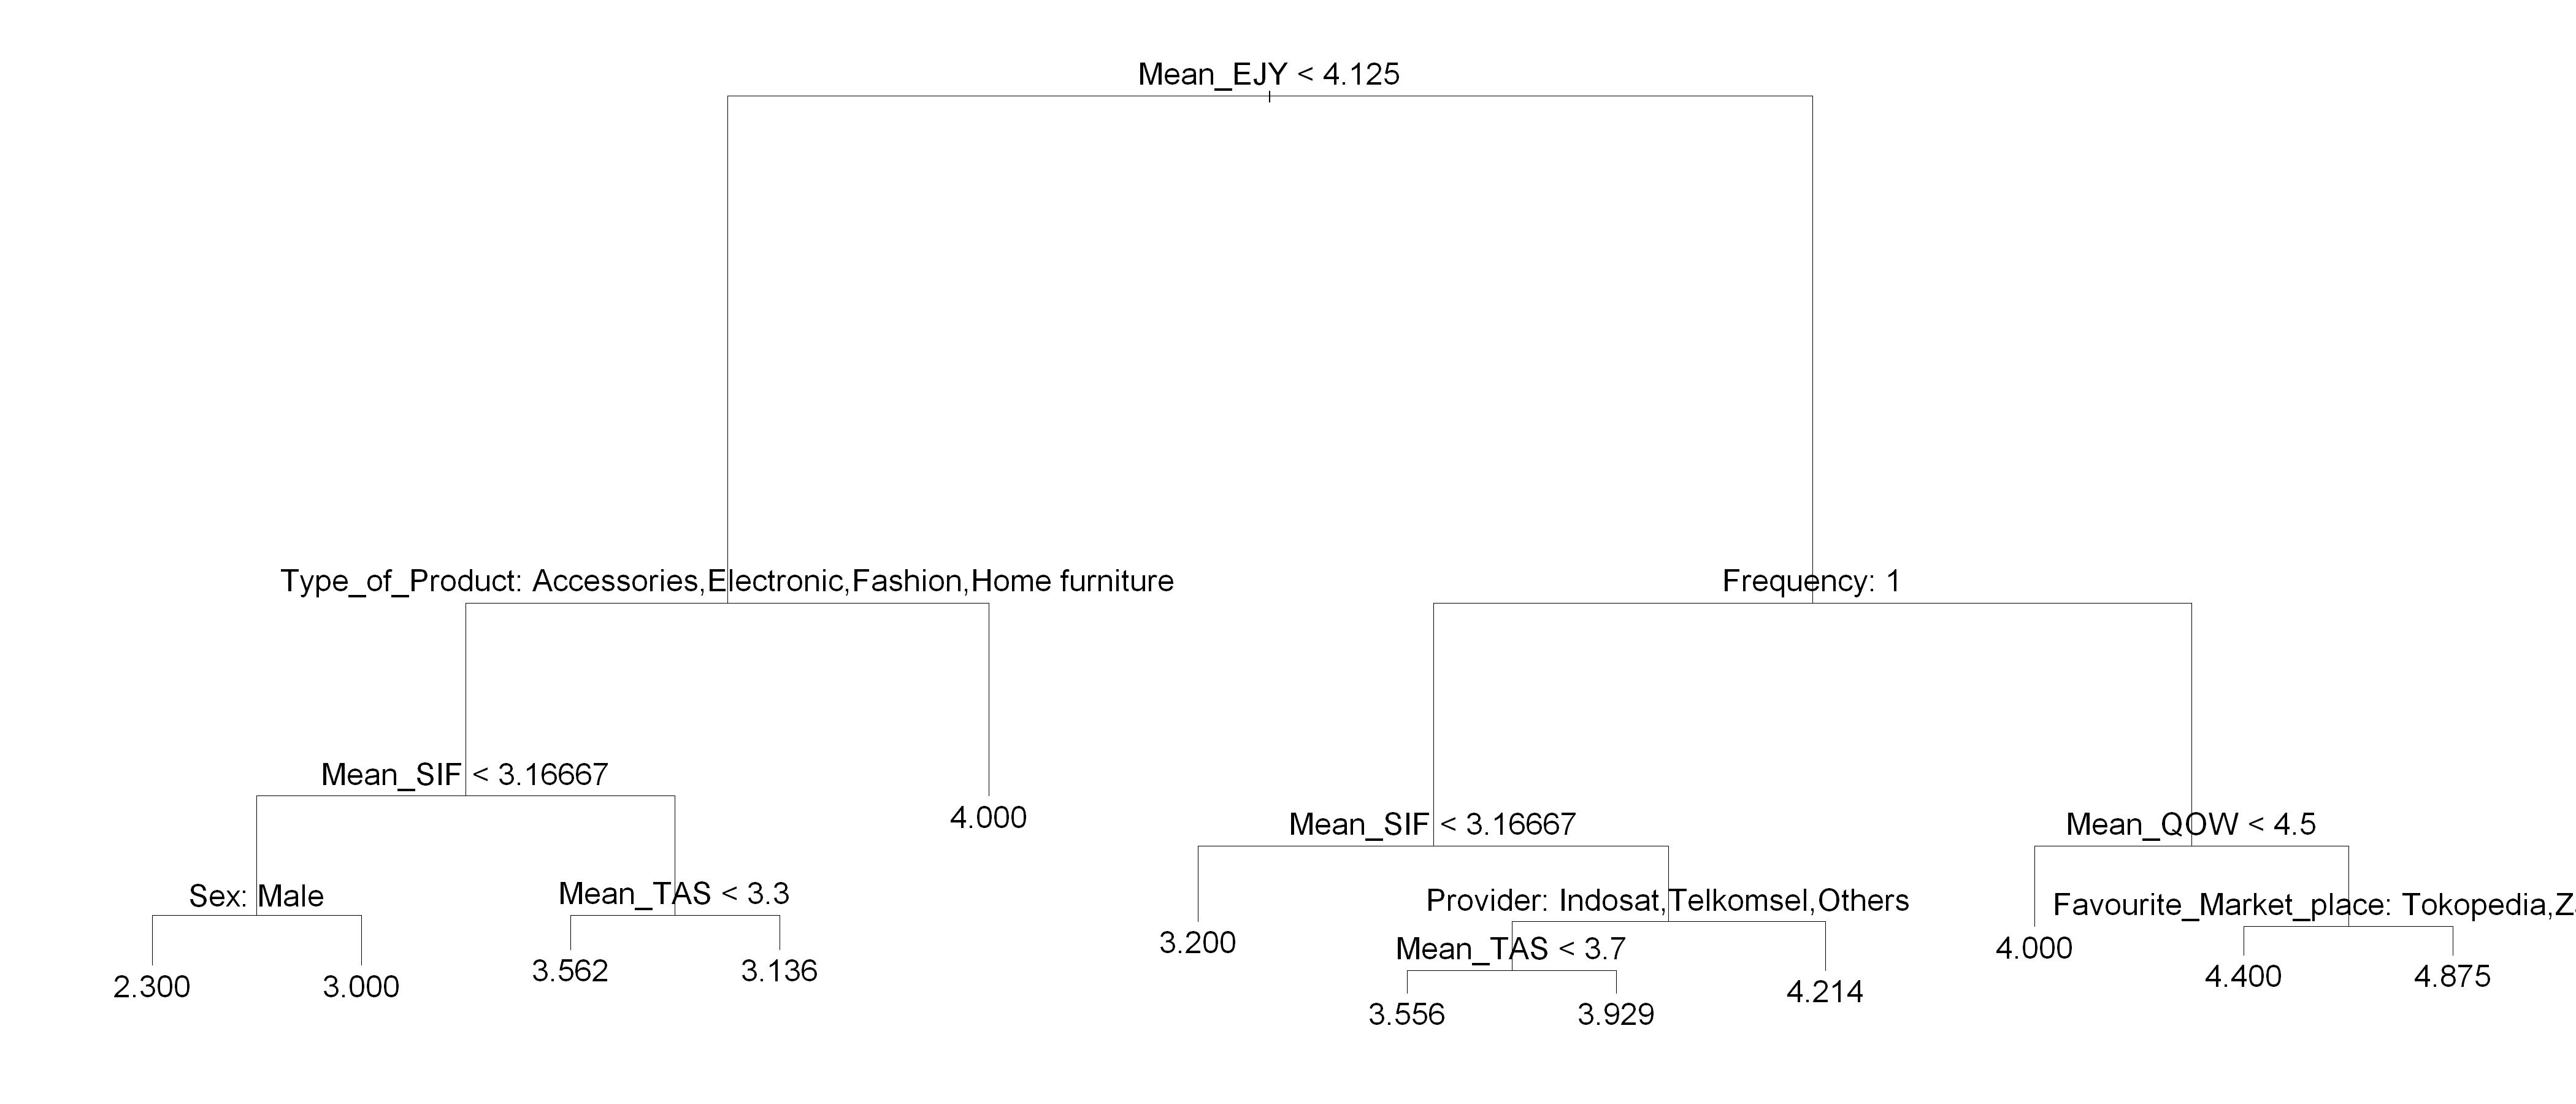

In [68]:
options(repr.plot.width=35, repr.plot.height=15)
plot(tree.fit)
text(tree.fit, pretty = 0, cex = 2.5)

[1] 0.184216

[1] 0.4292039

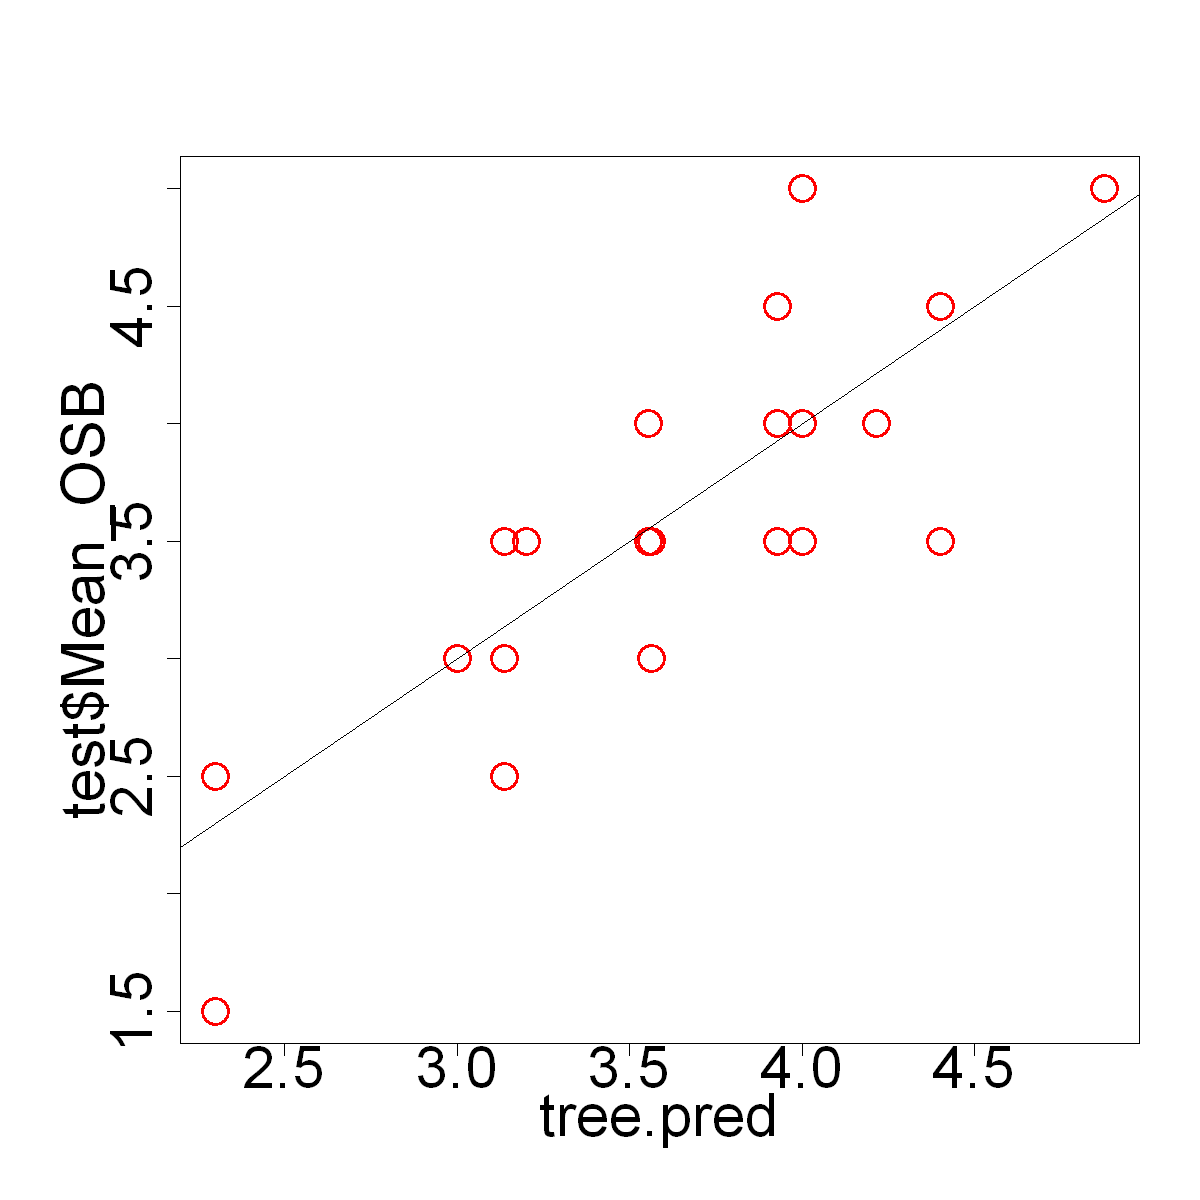

In [25]:
tree.pred <- predict(tree.fit, newdata = test)
options(repr.plot.width=10, repr.plot.height=10)
par(mfrow=c(1,1), mar=c(5,6,5,1)+1.5)
plot(tree.pred, test$Mean_OSB, cex=3, cex.lab=3, cex.axis=3, col='red', lwd=3)
abline(0,1)
mean((tree.pred - test$Mean_OSB)^2)  
sqrt(mean((tree.pred - test$Mean_OSB)^2)) 

### 1.4.2 Simpler Model

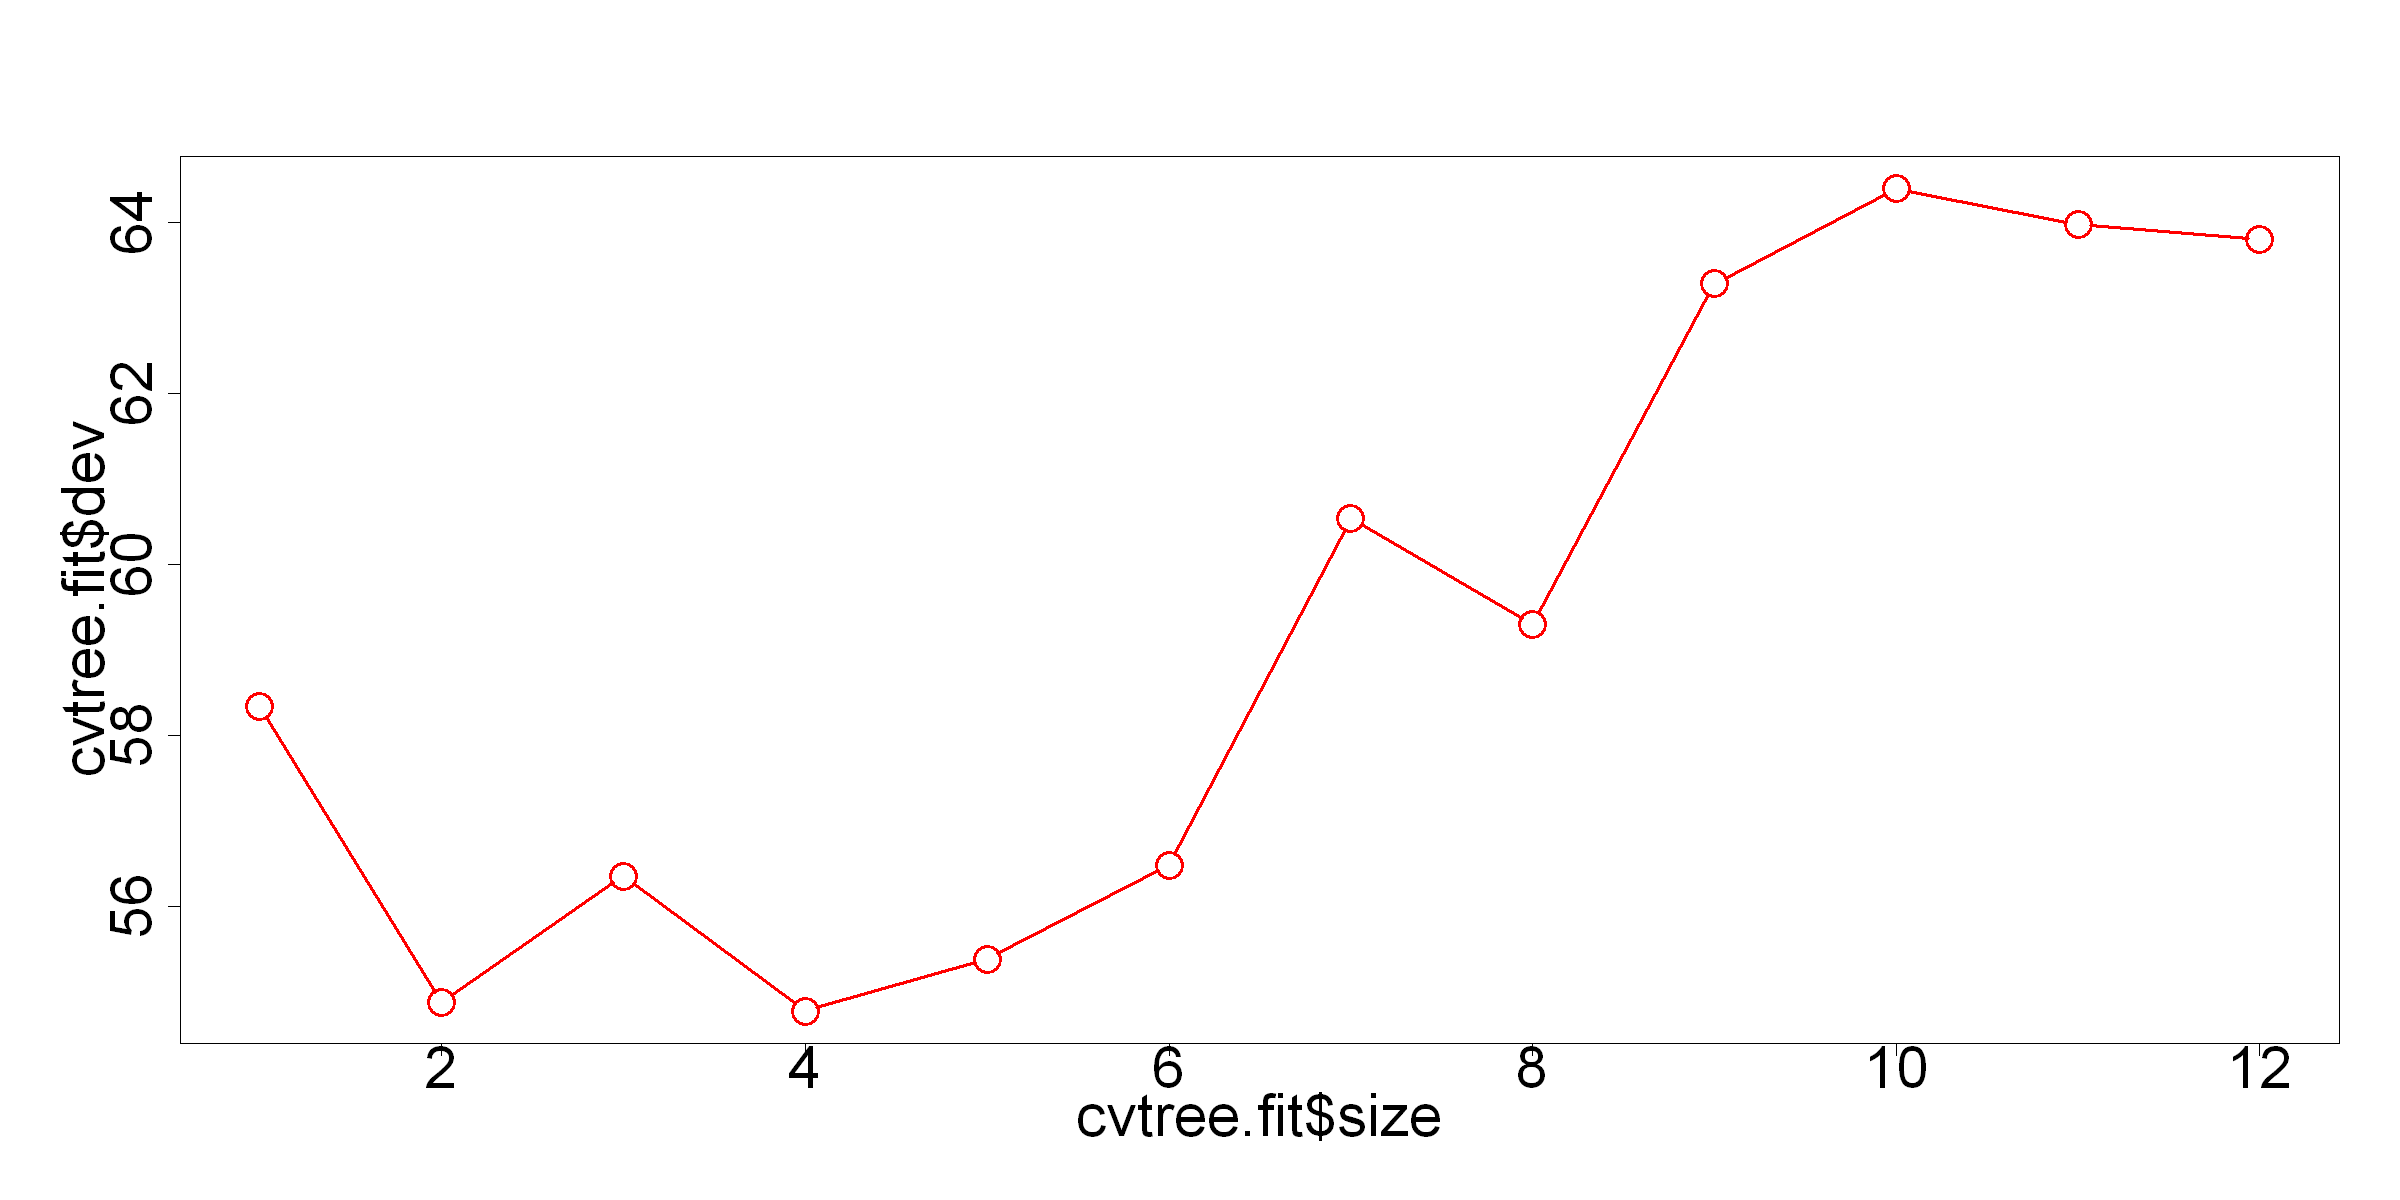

In [26]:
set.seed(1)
options(repr.plot.width=20, repr.plot.height=10)
par(mfrow=c(1,1), mar=c(5,6,5,1)+1.5)
cvtree.fit <- cv.tree(tree.fit)
plot(cvtree.fit$size, cvtree.fit$dev, type = 'b',cex=3, cex.lab=3, cex.axis=3, col='red', lwd=3)

In [27]:
prune.fit <- prune.tree(tree.fit, best = 4)
summary(prune.fit)


Regression tree:
snip.tree(tree = tree.fit, nodes = c(6L, 7L, 4L))
Variables actually used in tree construction:
[1] "Mean_EJY"        "Type_of_Product" "Frequency"      
Number of terminal nodes:  4 
Residual mean deviance:  0.361 = 28.52 / 79 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.7500 -0.2500  0.0000  0.0000  0.4138  1.4140 

In [28]:
prune.pred <- predict(prune.fit, newdata = test)
sqrt(mean((prune.pred - test$Mean_OSB)^2))

[1] 0.5458255

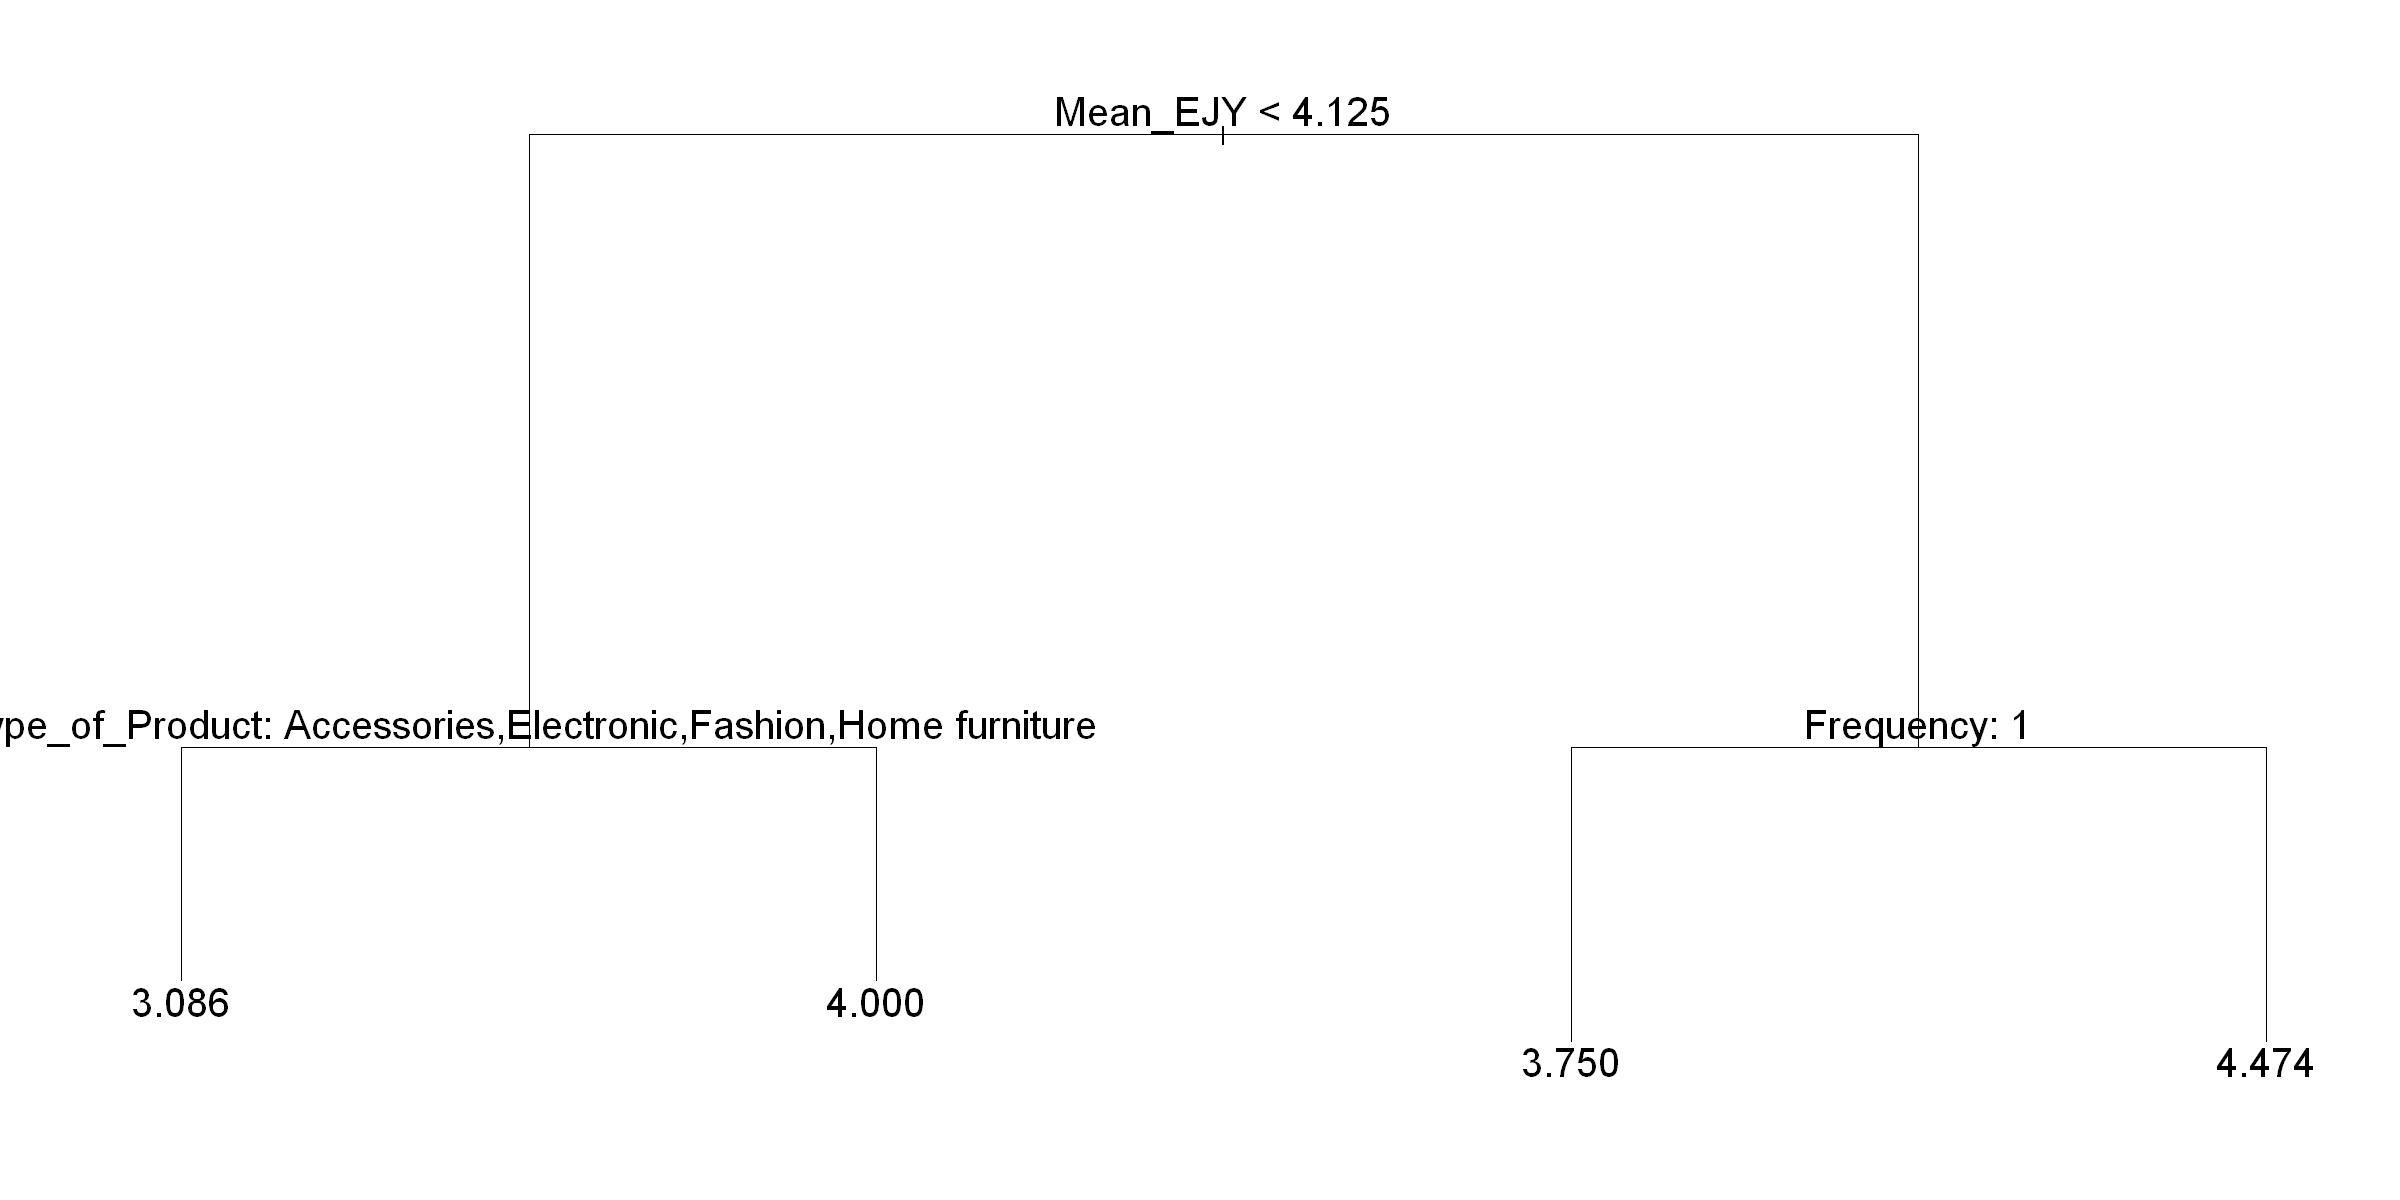

In [29]:
plot(prune.fit)
text(prune.fit, pretty = 0, cex = 2)

## 1.5 Random Forest

In [30]:
set.seed(1)
train <- OBS_tree %>%
  sample_frac(0.50)
test <- setdiff(OBS_tree, train)

# bagging (m = p, thus we use mtry = 13)
bag.fit <- randomForest(Mean_OSB ~., data = train, mtry = 13, importance = T)
bag.fit


Call:
 randomForest(formula = Mean_OSB ~ ., data = train, mtry = 13,      importance = T) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 13

          Mean of squared residuals: 0.4251707
                    % Var explained: 19.2

[1] 0.7303794

[1] 0.5334541

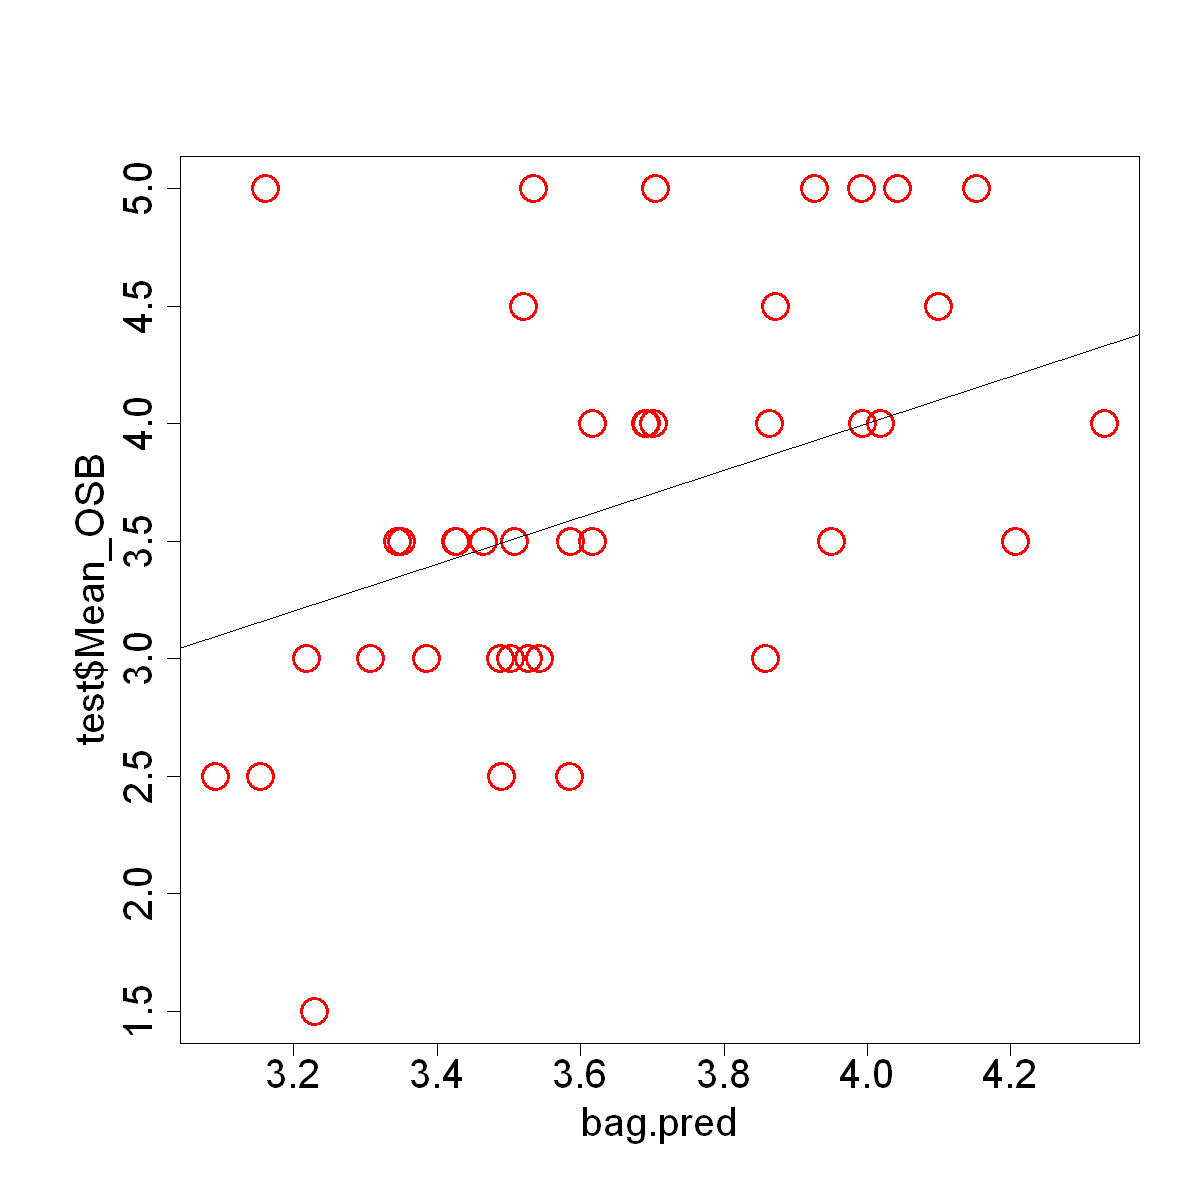

In [31]:
set.seed(1)
options(repr.plot.width=10,repr.plot.height=10)
par(mfrow=c(1,1), mar=c(5,6,5,1)+1.5)
bag.pred <- predict(bag.fit, newdata = test)
plot(bag.pred, test$Mean_OSB, cex=3, cex.lab=2 ,cex.axis=2, col='red', lwd=3)
abline(0, 1)
sqrt(mean((bag.pred - test$Mean_OSB)^2)) 
mean((bag.pred - test$Mean_OSB)^2)

In [32]:
set.seed(1, sample.kind = "Rounding")
OBS_tree <- cbind(cat_OBS, OBS_mean)
set.seed(1)
train_index <- sample(1:nrow(OBS_tree), nrow(OBS_tree) / 1.25)
train <- OBS_tree[train_index, ]
test <- OBS_tree[-train_index, ]

Warning message in set.seed(1, sample.kind = "Rounding"):
"non-uniform 'Rounding' sampler used"


In [33]:
test_MSE <- c()
OOB_MSE <- c()
mtry <- c()
i <- 1
set.seed(1)
for (Mtry in seq(1, 13, 2)) {
  
  rf_temp <- randomForest(y = train$Mean_OSB, 
                          x = train[ ,-20], 
                          ytest = test$Mean_OSB,
                          xtest = test[ ,-20],
                          mtry = Mtry, 
                          ntree = 500)
  
  test_MSE[[i]] <- rf_temp$test$mse
  
  OOB_MSE[[i]] <- rf_temp$mse
  
  mtry[[i]] <- rep(Mtry, 500)
  
  i <- i + 1
}
rf_summary <- data.frame(ntree = rep(1:500, length(seq(1, 13, 2))), 
                         mtry = unlist(mtry), 
                         test_MSE = unlist(test_MSE), 
                         OOB_MSE = unlist(OOB_MSE))

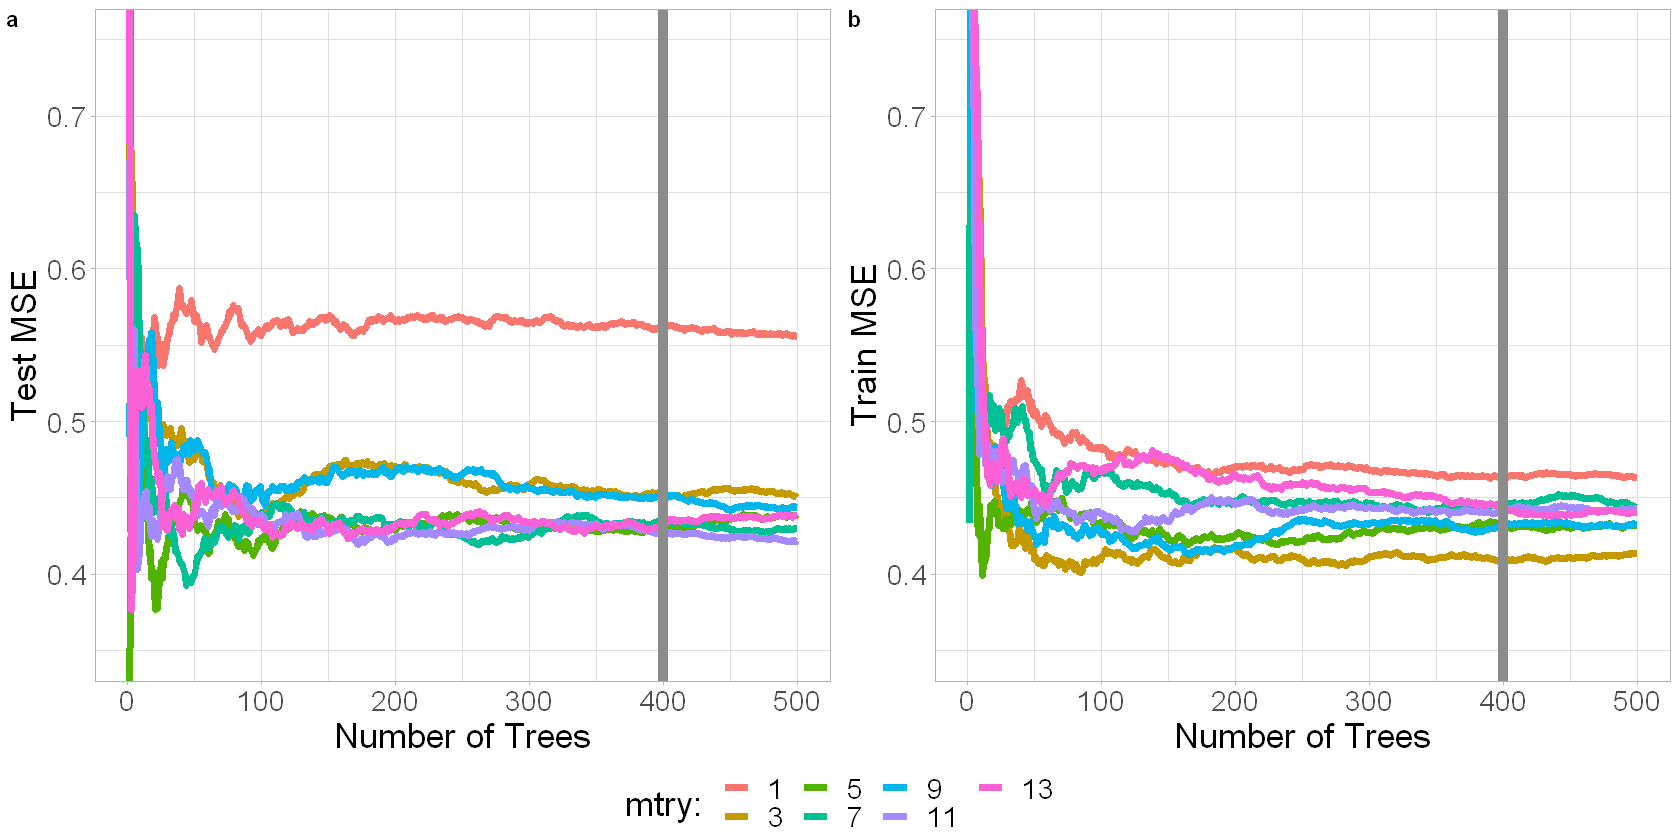

In [34]:
options(repr.plot.width=14, repr.plot.height=7)
a<- ggplot(rf_summary, aes(x = ntree, y = test_MSE, col = factor(mtry))) + 
  geom_line(lwd=2) +  geom_vline(xintercept = 400, col = "grey55", lwd=3) +
  coord_cartesian(ylim = c(0.35, 0.75)) + theme_light() + theme(text=element_text(size=21)) +
  labs(x = "Number of Trees", y = "Test MSE", col = "mtry:")
b<- ggplot(rf_summary, aes(x = ntree, y = OOB_MSE, col = factor(mtry))) + 
  geom_line(lwd=2) +  geom_vline(xintercept = 400, col = "grey55", lwd=3) +
  coord_cartesian(ylim = c(0.35, 0.75)) + theme_light() + theme(text=element_text(size=21)) +
  labs(x = "Number of Trees", y = "Train MSE", col = "mtry:")
ggarrange(a, b,nrow=1, ncol=2, labels=c("a","b"),common.legend = TRUE, legend = "bottom")

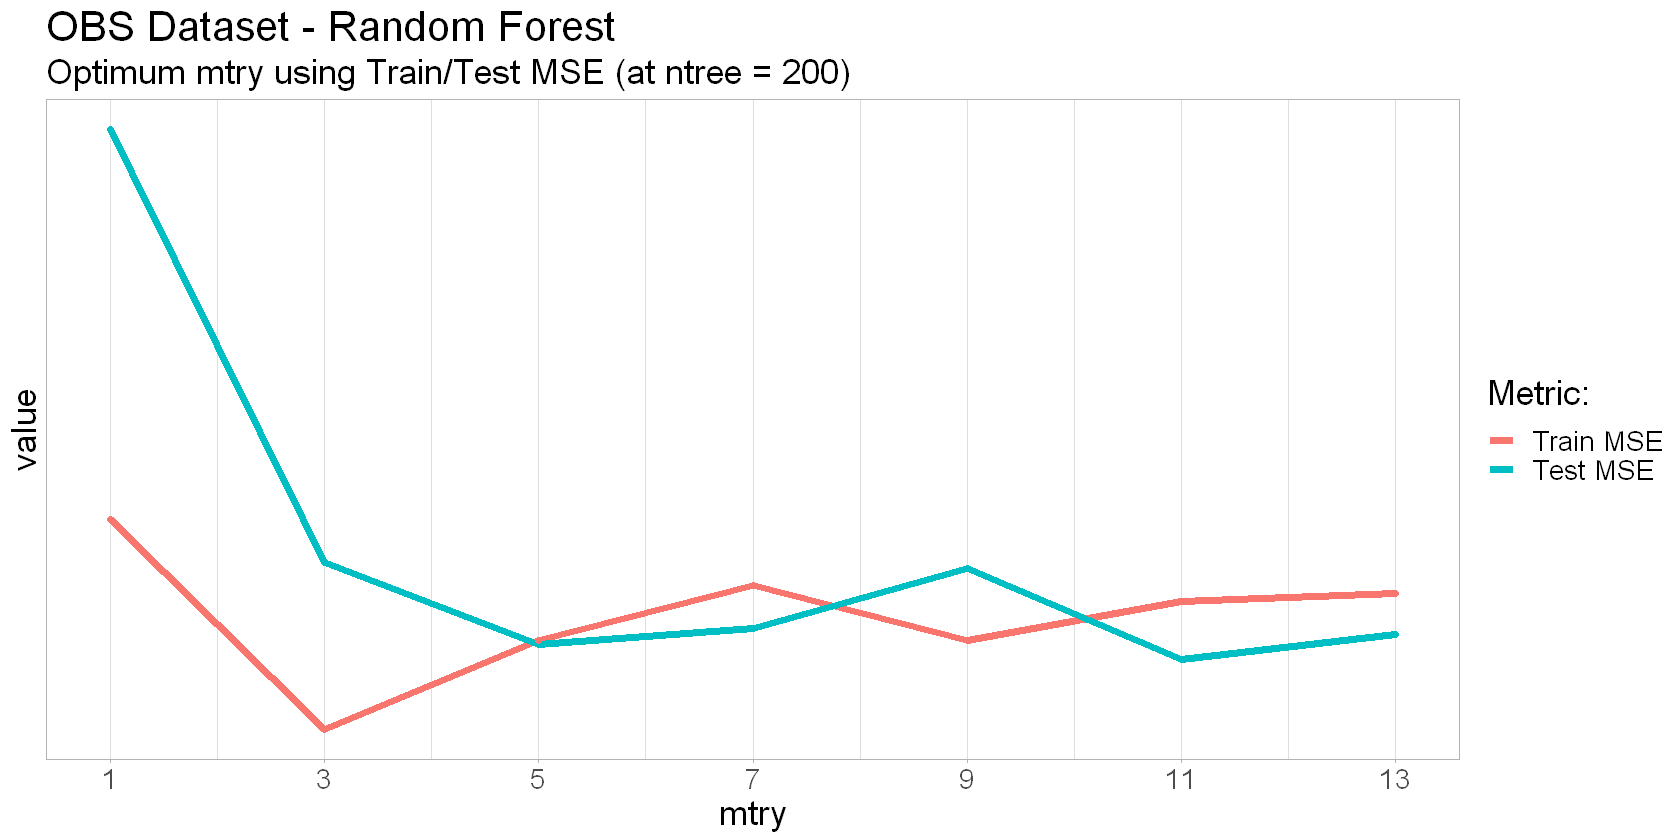

In [35]:
options(repr.plot.width=14, repr.plot.height=7)
rf_summary %>%
  filter(ntree == 400) %>%
  pivot_longer(cols = c(test_MSE, OOB_MSE), names_to = "metric") %>%
  ggplot(aes(x = mtry, y = value, col = factor(metric))) + geom_line(lwd=2) +  geom_point() + 
  scale_y_continuous(breaks = seq(10, 30, 2)) + scale_x_continuous(breaks = seq(1, 13, 2)) +
  scale_color_hue(labels = c("Train MSE", "Test MSE")) +
  labs(col = "Metric:", title = "OBS Dataset - Random Forest", 
       subtitle = "Optimum mtry using Train/Test MSE (at ntree = 200)") + 
  theme(legend.position = "bottom", axis.title.y = element_blank()) + theme_light() + 
  theme(text=element_text(size=21))

In [36]:
bag.fit <- randomForest(Mean_OSB ~., data = OBS_tree, mtry = 5, ntry = 500, importance = T)
bag.pred <- predict(bag.fit)
sqrt(mean((bag.pred - OBS_tree$Mean_OSB)^2)) 

[1] 0.6509454

In [37]:
# view importance of randomforest fit
importance(bag.fit)

,%IncMSE,IncNodePurity
Sex,0.077064956,0.3130620
Allowence,-2.334572890,1.3752095
Semester,0.001228538,1.1632166
Internet_usage,-2.813642999,0.7267659
Frequency,6.396487787,3.4327239
Favourite_Market_place,-1.759696249,2.9129535
Product,0.000000000,0.0000000
Purchased_product,1.350394146,0.3863925
Provider,3.069872381,3.8710529
Price,1.196565679,0.6639301


<font color='blue'>
<h4 align="left">
Insight: Mean Enjoyment is the most important variable.

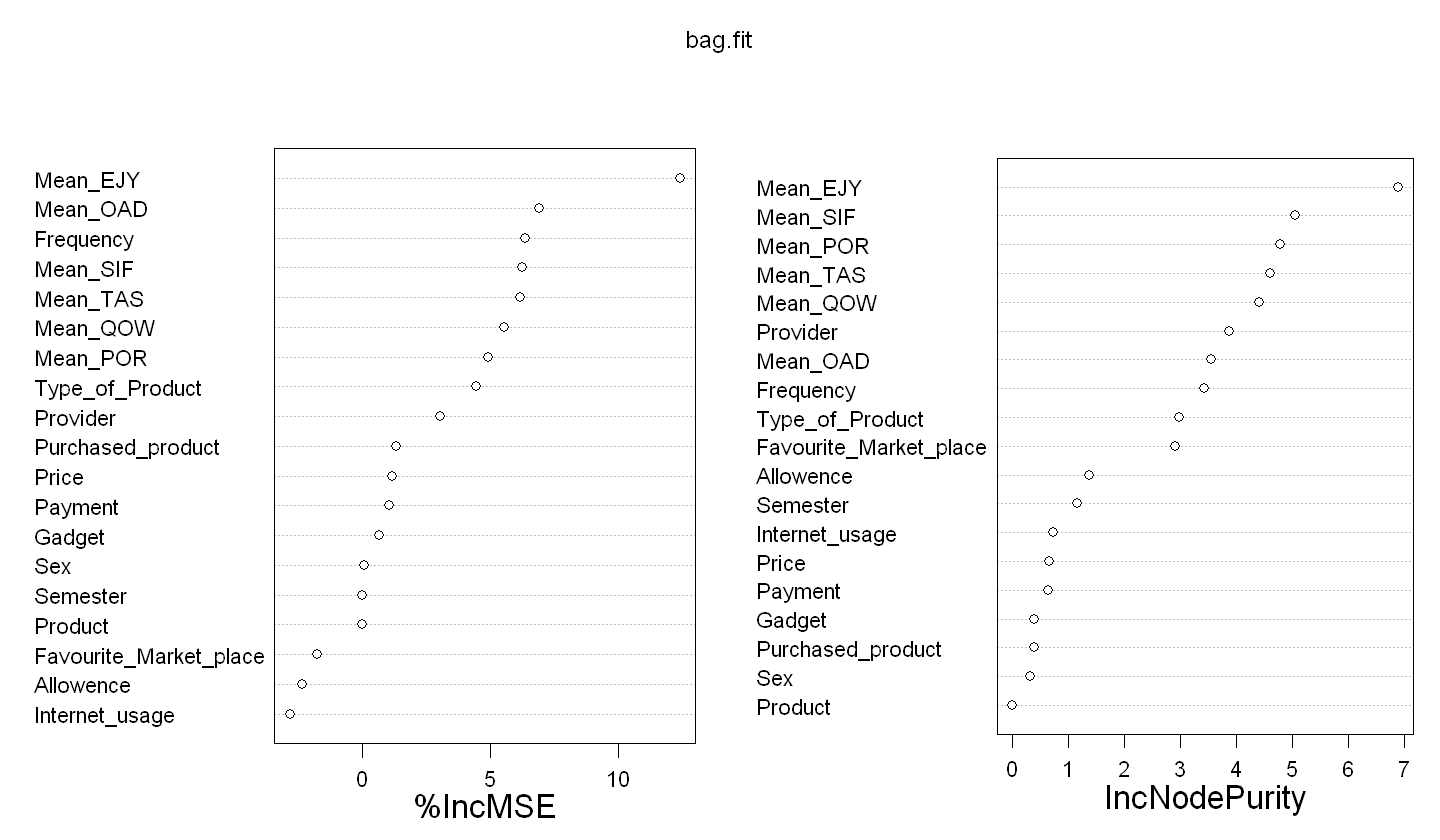

In [38]:
options(repr.plot.width=12,repr.plot.height=7)
par(mfrow=c(1,1), mar=c(5,6,5,1)+1.5)
varImpPlot(bag.fit,  cex=1.1, cex.lab=1.5,cex.axis=2, lwd=2)  

<div class="alert-info">
<font color='blue'>
<h3 align="center">
~ 

# 2. PLS-SEM Approach

## 2.1 Items Analysis

### 2.2.1 Principal Component Analysis

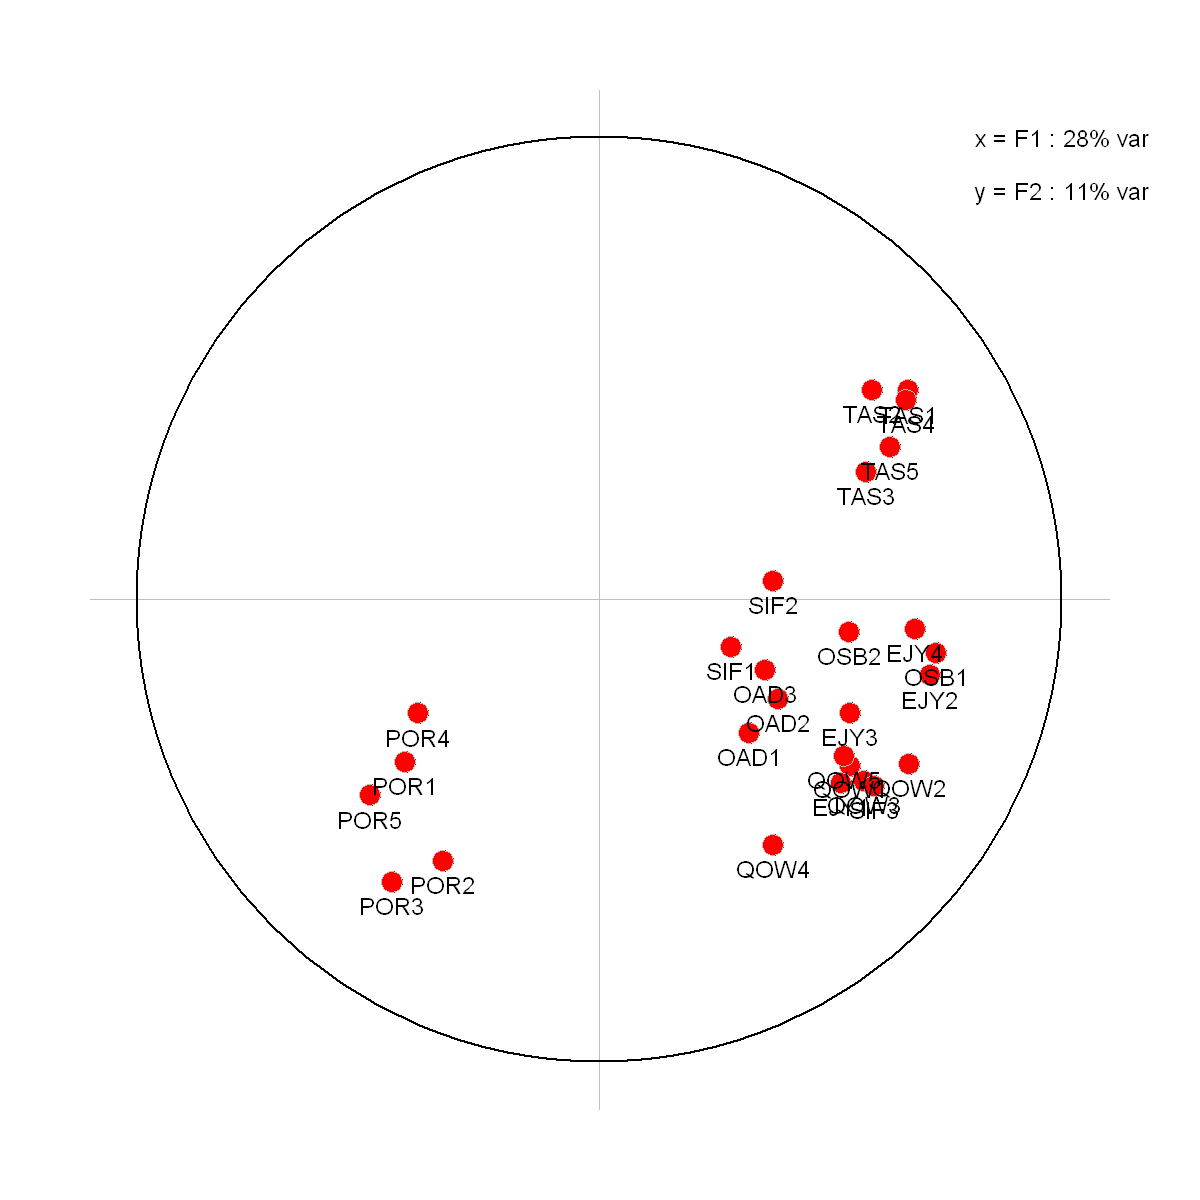

In [39]:
options(repr.plot.width=10, repr.plot.height=10)
mdspca(OBS_PLS, cx=1.2)

### 2.1.2 Multidimensional Scaling

initial  value 11.808648 
iter   5 value 8.863240
final  value 8.593730 
converged


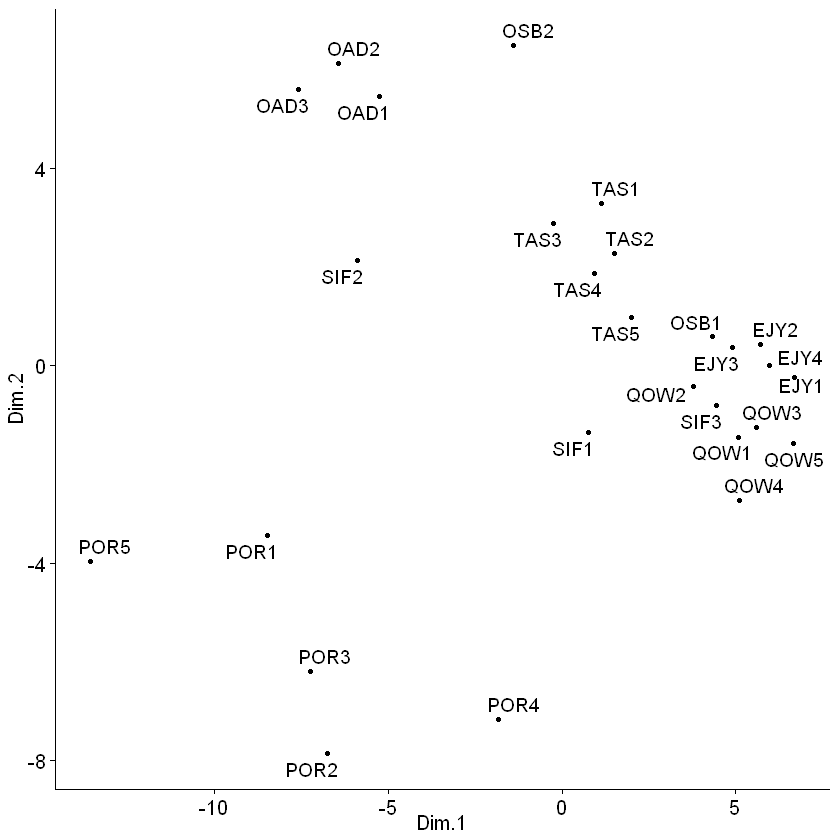

In [91]:
options(repr.plot.width=7, repr.plot.height=7)
mds <- t(OBS_PLS) %>% dist() %>% isoMDS() %>% .$points %>% as_tibble()
colnames(mds) <- c("Dim.1", "Dim.2")
ggscatter(mds, x = "Dim.1", y = "Dim.2", label = rownames(t(OBS_PLS)),
          size = 1,repel = TRUE)

### 2.1.3 Correlation Analysis

Warning message in cor.smooth(mat):
"Matrix was not positive definite, smoothing was done"


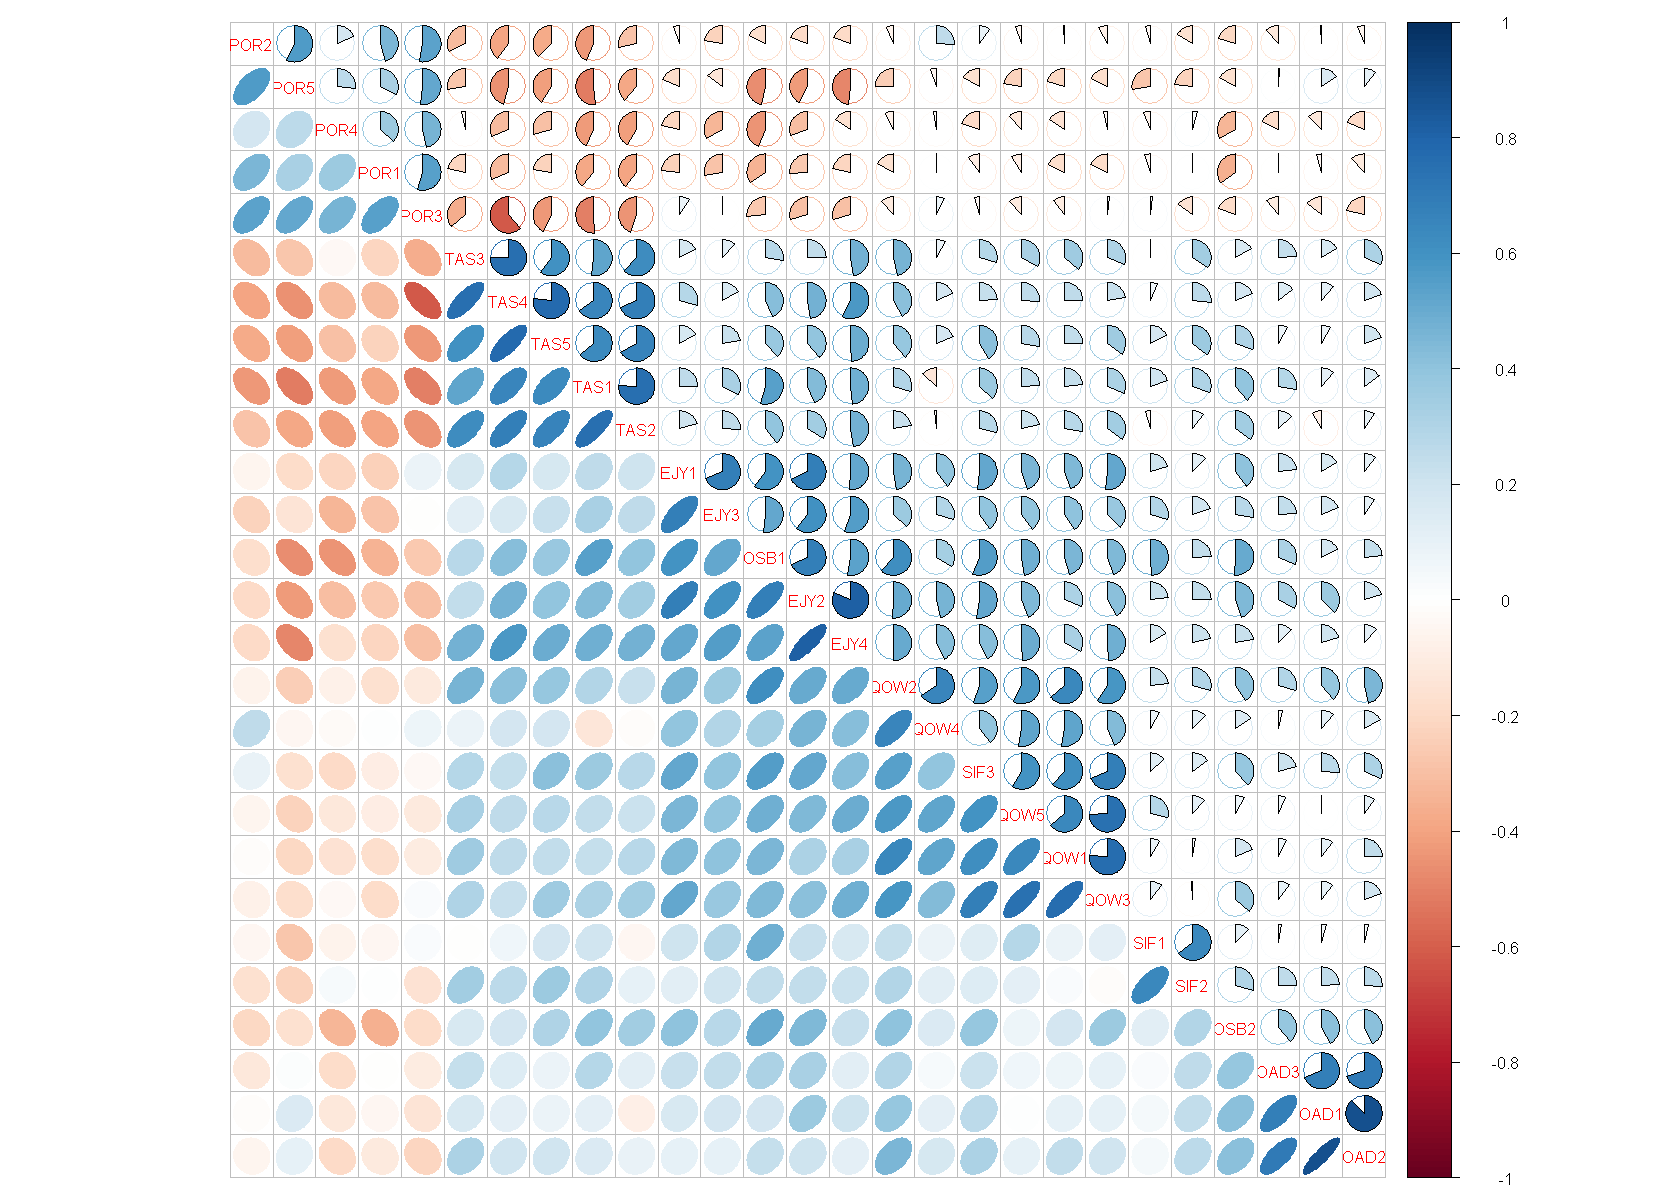

In [41]:
options(repr.plot.width=14, repr.plot.height=10)
cordata <-polychoric(OBS_PLS)$rho
corrplot.mixed(cordata, lower = 'ellipse', upper = 'pie', order = 'hclust',tl.cex = 0.8 )

### 2.1.4 Multidimensional Scaling with Polychoric Correlation 

<font color='blue'>
<h4 align="left">
Insight: OSB2 are closely associated with TAS items and OSB1 are closely associated with EJY4,EJY2, EJY3, SIF3, and QOW2.

- OSB2: Consumer prefers online shopping over conventional shopping
 - TAS1: Consumer feels convenience with online shopping
 - TAS2: Consumer trusts the online shopping website
 - TAS3: Customer feels that privacy is maintained when doing online shopping
 - TAS4: Online shopping website has good safety features
 - TAS5: Online shopping website has a good reputation

- OSB1: Customer will repeat the online shopping
 - EJY2: Online shopping makes it easy to purchase goods
 - EJY3: Information and facility make it easy to compare and purchase goods
 - EJY4: Online shopping is easy to be carried out in general
 - SIF3: Technological development influences the customer to shop online
 - QOW2: Consumer buys from online shop if the navigation flow is user friendly

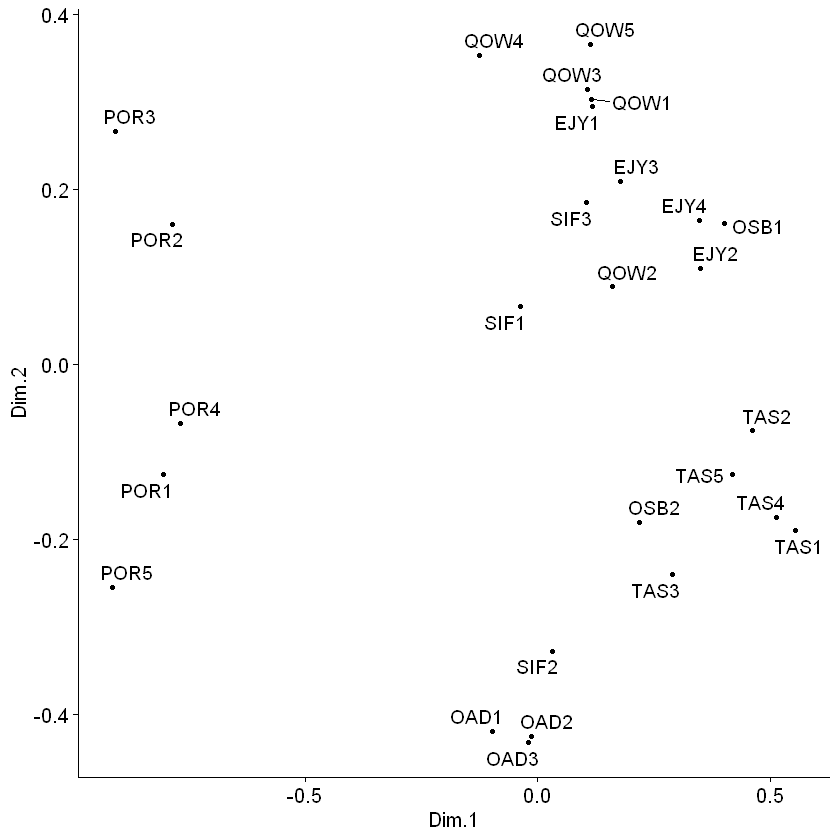

In [90]:
options(repr.plot.width=7, repr.plot.height=7)
mds.cor <- (1 - cordata) %>% cmdscale() %>% as_tibble();colnames(mds.cor) <- c("Dim.1", "Dim.2")
ggscatter(mds.cor, x = "Dim.1", y = "Dim.2", size = 1, label = colnames(cordata),repel = TRUE)

## 2.2 PLS-SEM Modeling

## 2.2.1 Measurement Model

In [43]:
OBS_mm <- constructs(
 composite('POR', multi_items('POR', 1:5), weights = mode_A),
 composite('TAS', multi_items('TAS', 1:5), weights = mode_A),
 composite('QOW', multi_items('QOW', 1:5), weights = mode_A),
 composite('EJY', multi_items('EJY', 1:4), weights = mode_A),
 composite('SIF', multi_items('SIF', 1:3), weights = mode_A),
 composite('OAD', multi_items('OAD', 1:3), weights = mode_A),
 composite('OSB', multi_items('OSB', 1:2), weights = mode_A))
OBS_mm

$composite
 [1] "POR"  "POR1" "A"    "POR"  "POR2" "A"    "POR"  "POR3" "A"    "POR" 
[11] "POR4" "A"    "POR"  "POR5" "A"   
attr(,"class")
[1] "character" "construct" "composite"

$composite
 [1] "TAS"  "TAS1" "A"    "TAS"  "TAS2" "A"    "TAS"  "TAS3" "A"    "TAS" 
[11] "TAS4" "A"    "TAS"  "TAS5" "A"   
attr(,"class")
[1] "character" "construct" "composite"

$composite
 [1] "QOW"  "QOW1" "A"    "QOW"  "QOW2" "A"    "QOW"  "QOW3" "A"    "QOW" 
[11] "QOW4" "A"    "QOW"  "QOW5" "A"   
attr(,"class")
[1] "character" "construct" "composite"

$composite
 [1] "EJY"  "EJY1" "A"    "EJY"  "EJY2" "A"    "EJY"  "EJY3" "A"    "EJY" 
[11] "EJY4" "A"   
attr(,"class")
[1] "character" "construct" "composite"

$composite
[1] "SIF"  "SIF1" "A"    "SIF"  "SIF2" "A"    "SIF"  "SIF3" "A"   
attr(,"class")
[1] "character" "construct" "composite"

$composite
[1] "OAD"  "OAD1" "A"    "OAD"  "OAD2" "A"    "OAD"  "OAD3" "A"   
attr(,"class")
[1] "character" "construct" "composite"

$composite
[1] "OSB"  "OSB1" "A"    "OSB"  "OSB2" "A"   
attr(,"class")
[1] "character" "construct" "composite"

attr(,"class")
[1] "list"              "measurement_model" "seminr_model"

## 2.2.2 Structural model

In [44]:
OBS_sm <- relationships(
 paths(from = c('POR', 'TAS', 'QOW', 'EJY', 'SIF', 'OAD'), to = c('OSB')))
OBS_sm

source,target
POR,OSB
TAS,OSB
QOW,OSB
EJY,OSB
SIF,OSB
OAD,OSB


## 2.2.3 Final Model

In [45]:
OBS_model <- estimate_pls(data = OBS_PLS,
                          measurement_model = OBS_mm,
                          structural_model = OBS_sm,
                          inner_weights = path_weighting)

Generating the seminr model

All 83 observations are valid.



## 2.2.4 Model Summary

<font color='blue'>
<h4 align="left">
Insight: PLS-SEM has a better R-squared.

In [46]:
summary_OBS_model <- summary(OBS_model)
summary_OBS_model$paths

,OSB
R^2,0.55017382
AdjR^2,0.51466123
POR,-0.26863727
TAS,0.04503902
QOW,0.15112794
EJY,0.24471215
SIF,0.24688968
OAD,0.16282708


In [47]:
summary_OBS_model$reliability

,alpha,rhoC,AVE,rhoA
POR,0.7487931,0.8282561,0.4920104,0.7447282
TAS,0.8726548,0.9057017,0.6582446,0.9022774
QOW,0.8330176,0.8802958,0.5966233,0.8798367
EJY,0.8221165,0.8817938,0.6515971,0.8462058
SIF,0.5356649,0.7524216,0.5032781,0.5122734
OAD,0.8769559,0.9238266,0.8017647,0.8842387
OSB,0.6132486,0.8348920,0.7172661,0.6505434


<font color='blue'>
<h4 align="left">
Insight: SIF shows  very low realibility.

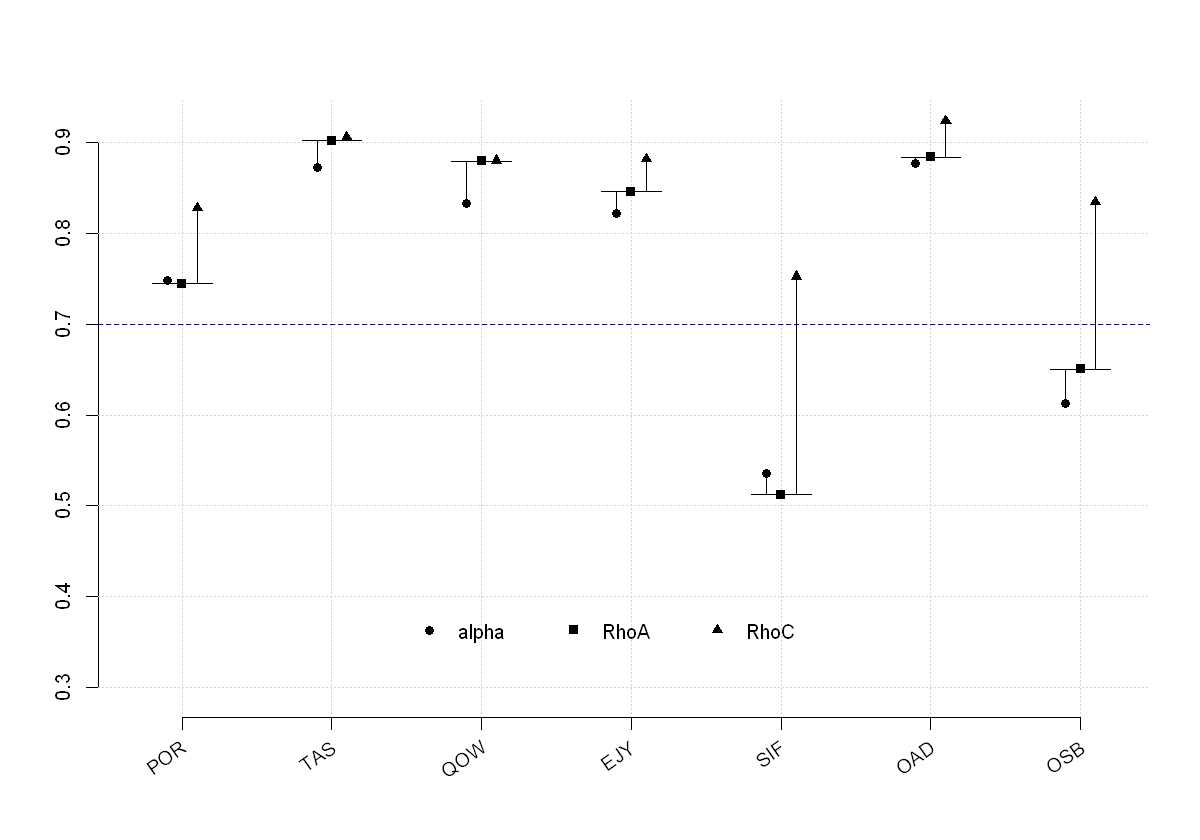

In [48]:
options(repr.plot.width=10, repr.plot.height=7)
plot(summary_OBS_model$reliability)

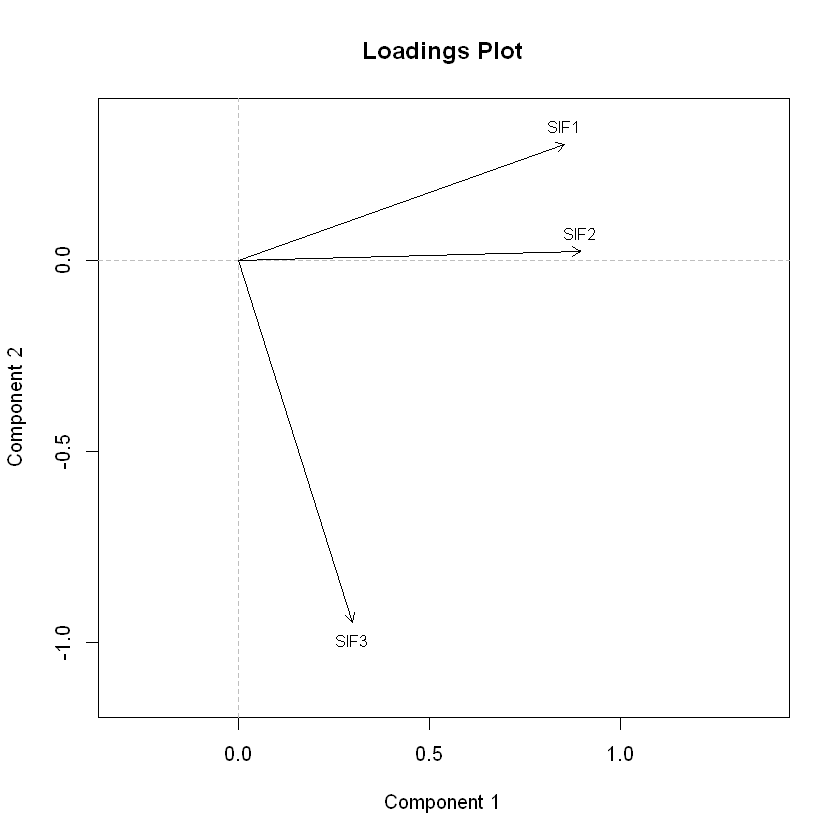

In [95]:
options(repr.plot.width=7, repr.plot.height=7)
plot(princals(OBS_PLS[, grep('SIF', names(OBS_PLS))]))

 - SIF1: People around the customer frequently do online shopping
 - SIF2: People around the customer recommend online shopping over traditional shopping
 - **SIF3: Technological development influences the customer to shop online**

In [104]:
summary_OBS_model$descriptives$statistics$constructs

,No.,Missing,Mean,Median,Min,Max,Std.Dev.,Kurtosis,Skewness
POR,1,0,1.555257e-16,-0.08631163,-2.175093,2.644392,1,2.594484,0.011559460
TAS,2,0,5.802441e-18,0.03179333,-2.993691,2.016463,1,3.393641,-0.007181119
QOW,3,0,-2.539058e-17,0.03293204,-2.957066,1.258985,1,3.150035,-0.662483914
EJY,4,0,2.775558e-17,-0.06554077,-3.379559,1.163293,1,3.515044,-0.834760366
SIF,5,0,-3.374246e-16,-0.03051343,-2.547645,2.049832,1,3.121937,-0.370048571
OAD,6,0,1.984743e-17,-0.02785306,-2.067044,1.909012,1,2.577815,-0.344383071
OSB,7,0,2.568896e-16,-0.23858210,-2.930467,1.560424,1,2.956753,-0.305833467


## 2.2.5 Bootstrapped Model

In [52]:
boot_OBS_model <- bootstrap_model(seminr_model = OBS_model,
                                        nboot = 100,
                                        cores = NULL,
                                        seed = 123)

Bootstrapping model using seminr...

SEMinR Model successfully bootstrapped



**coeffcients of partial regression models for the relationship between two constructs**

In [53]:
sum_boot_OBS_model <- summary(boot_OBS_model)
sum_boot_OBS_model$bootstrapped_paths

,Original Est.,Bootstrap Mean,Bootstrap SD,T Stat.,2.5% CI,97.5% CI
POR -> OSB,-0.26863727,-0.25687382,0.07183227,-3.7397851,-0.385415814,-0.1029249
TAS -> OSB,0.04503902,0.06615833,0.09533417,0.4724331,-0.095271685,0.2392034
QOW -> OSB,0.15112794,0.14263715,0.13208912,1.1441361,-0.101083032,0.3687038
EJY -> OSB,0.24471215,0.23274997,0.13360280,1.8316393,-0.022369097,0.4877032
SIF -> OSB,0.24688968,0.27073208,0.10344297,2.3867227,0.061208665,0.4905704
OAD -> OSB,0.16282708,0.16533241,0.07758711,2.0986359,0.008706565,0.2909341


**standardized correlations for the relationships between the construct and each of its items**

In [54]:
sum_boot_OBS_model$bootstrapped_loading 

,Original Est.,Bootstrap Mean,Bootstrap SD,T Stat.,2.5% CI,97.5% CI
POR1 -> POR,0.7250086,0.7391933,0.07499361,9.667605,0.5813970,0.8553862
POR2 -> POR,0.6425118,0.6212267,0.11460499,5.606317,0.3340078,0.7743589
POR3 -> POR,0.7680419,0.7528216,0.08274789,9.281710,0.5860086,0.8498310
POR4 -> POR,0.6596535,0.6530634,0.11755826,5.611290,0.4108435,0.8016379
POR5 -> POR,0.7046713,0.6807094,0.15028465,4.688911,0.2847747,0.8742540
TAS1 -> TAS,0.8410899,0.8449180,0.03285593,25.599335,0.7661254,0.8947126
TAS2 -> TAS,0.8433573,0.8399986,0.04016747,20.996029,0.7343154,0.8922769
TAS3 -> TAS,0.7330553,0.7268179,0.09331143,7.856008,0.5170519,0.8586292
TAS4 -> TAS,0.8354079,0.8281193,0.04715948,17.714526,0.7214892,0.8973468
TAS5 -> TAS,0.7982874,0.7859237,0.05851392,13.642693,0.6390905,0.8588939


In [55]:
construct_scores <- data.frame(OBS_model$construct_scores)
construct_scores$Sex <- cat_OBS$Sex
construct_scores$Allowence <- cat_OBS$Allowence
construct_scores$Frequency <-cat_OBS$Frequency
summary(construct_scores)

      POR                TAS                QOW                EJY          
 Min.   :-2.17509   Min.   :-2.99369   Min.   :-2.95707   Min.   :-3.37956  
 1st Qu.:-0.75101   1st Qu.:-0.63121   1st Qu.:-0.50473   1st Qu.:-0.46786  
 Median :-0.08631   Median : 0.03179   Median : 0.03293   Median :-0.06554  
 Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.00000  
 3rd Qu.: 0.70534   3rd Qu.: 0.52718   3rd Qu.: 0.83305   3rd Qu.: 0.81269  
 Max.   : 2.64439   Max.   : 2.01646   Max.   : 1.25898   Max.   : 1.16329  
      SIF                OAD                OSB              Sex    
 Min.   :-2.54764   Min.   :-2.06704   Min.   :-2.9305   Male  :34  
 1st Qu.:-0.59067   1st Qu.:-0.72193   1st Qu.:-0.6916   Female:49  
 Median :-0.03051   Median :-0.02785   Median :-0.2386              
 Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.0000              
 3rd Qu.: 0.49182   3rd Qu.: 0.82140   3rd Qu.: 0.6609              
 Max.   : 2.04983   Max.   : 1.90901   Max.   :

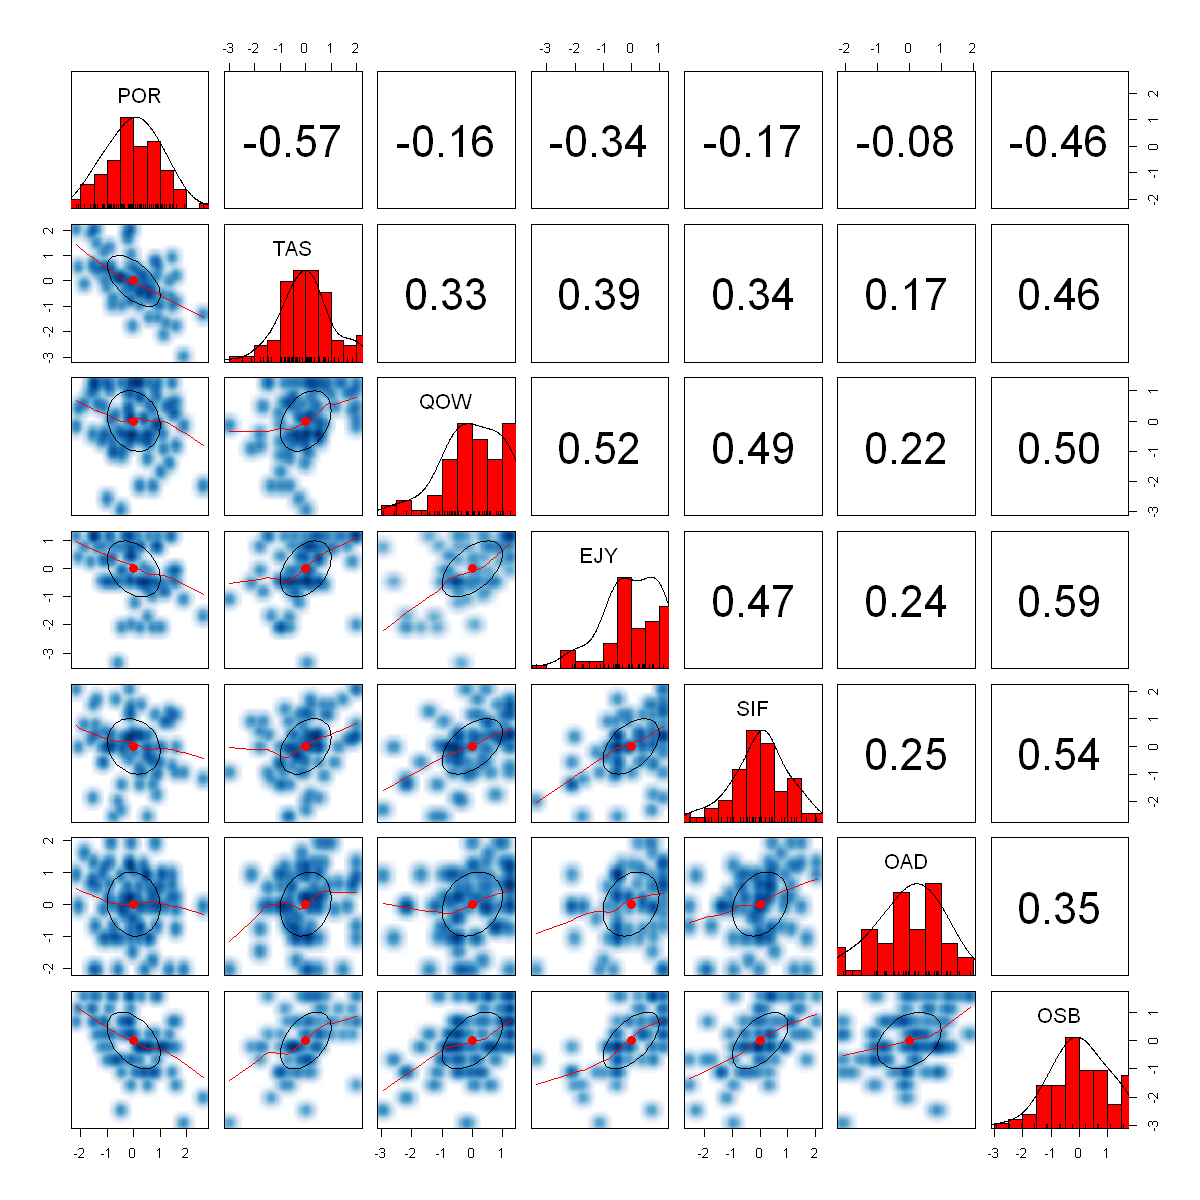

In [56]:
options(repr.plot.width=10, repr.plot.height=10)
ind<- which(lapply(construct_scores, is.numeric)==T)
pairs.panels(construct_scores[, ind],cex.labels=1.6, cex.cor=2, smoother = T,hist.col = 'red' )

<div class="alert-info">
<font color='blue'>
<h3 align="center">
~ 